# Entrenamiento de modelos de clasificación

In [5]:
import random
import sys
sys.path.append('../../../')
import Modelos
import pandas as pd
from sklearn.model_selection import train_test_split
random.seed(6)

In [2]:
nombre_archivo = "../../../GermanRisk/german_credit_data_prepared.csv"

datos_con_gen = pd.read_csv(nombre_archivo)
datos_con_gen.head()

Age  Credit amount  Duration  Job_1  Job_2  Job_3  Sex_male  Housing_own  \
0  2.267         -0.441      -1.0      0      1      0         1            1   
1 -0.733          1.393       2.5      0      1      0         0            1   
2  1.067         -0.086      -0.5      1      0      0         1            1   
3  0.800          2.134       2.0      0      1      0         1            0   
4  1.333          0.978       0.5      0      1      0         1            0   

   Housing_rent  Saving accounts_1  ...  Checking account_1  \
0             0                  0  ...                   0   
1             0                  0  ...                   1   
2             0                  0  ...                   0   
3             0                  0  ...                   0   
4             0                  0  ...                   0   

   Checking account_2  Purpose_car  Purpose_domestic appliances  \
0                   0            0                            0   
1                   0            0                            0   
2                   0            0                            0   
3                   0            0                            0   
4                   0            1                            0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                  0                            0                 1   
1                  0                            0                 1   
2                  1                            0                 0   
3                  0                            1                 0   
4                  0                            0                 0   

   Purpose_repairs  Purpose_vacation/others  Risk_True  
0                0                        0          0  
1                0                        0          1  
2                0                        0          0  
3                0                        0          0  
4                0                        0          1  

[5 rows x 22 columns]

In [3]:
# Dividir los datos en características (X) y etiquetas (y)
datos_leidos = datos_con_gen.copy()
datos_leidos = datos_leidos.drop('Sex_male', axis=1)
X = datos_leidos.drop('Risk_True', axis=1)  # Características
y = datos_leidos['Risk_True']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
datos_leidos.head()

Age  Credit amount  Duration  Job_1  Job_2  Job_3  Sex_male  Housing_own  \
0  2.267         -0.441      -1.0      0      1      0         1            1   
1 -0.733          1.393       2.5      0      1      0         0            1   
2  1.067         -0.086      -0.5      1      0      0         1            1   
3  0.800          2.134       2.0      0      1      0         1            0   
4  1.333          0.978       0.5      0      1      0         1            0   

   Housing_rent  Saving accounts_1  ...  Checking account_1  \
0             0                  0  ...                   0   
1             0                  0  ...                   1   
2             0                  0  ...                   0   
3             0                  0  ...                   0   
4             0                  0  ...                   0   

   Checking account_2  Purpose_car  Purpose_domestic appliances  \
0                   0            0                            0   
1                   0            0                            0   
2                   0            0                            0   
3                   0            0                            0   
4                   0            1                            0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                  0                            0                 1   
1                  0                            0                 1   
2                  1                            0                 0   
3                  0                            1                 0   
4                  0                            0                 0   

   Purpose_repairs  Purpose_vacation/others  Risk_True  
0                0                        0          0  
1                0                        0          1  
2                0                        0          0  
3                0                        0          0  
4                0                        0          1  

[5 rows x 22 columns]

**Reporte de clasificación (Classification Report) por clases**:

**Precision (Precisión)**: Es la proporción de verdaderos positivos sobre el total de predicciones positivas hechas por el modelo.

**Recall (Recuperación o Sensibilidad)**: Es la proporción de verdaderos positivos sobre el total de casos positivos reales en el conjunto de datos.

**F1-score**: Es una medida que combina tanto la precisión como el recall en una sola métrica. Es útil cuando hay un desequilibrio entre las clases. Un F1-score alto indica un buen equilibrio entre precisión y recall.

**Support**: Es el número de muestras reales en cada clase en el conjunto de datos de prueba.

**Macro avg y weighted avg**: Son promedios de las métricas de precision, recall y f1-score, calculados de diferentes maneras. Macro avg calcula el promedio no ponderado de las métricas para todas las clases. Weighted avg calcula el promedio ponderado por el número de muestras en cada clase. En este caso, el macro avg y weighted avg para precision, recall y f1-score son similares debido a un equilibrio relativamente uniforme entre las clases.

### Modelos obtenidos

GUARDAR Y CARGAR CON PICKLE

In [1]:
# Imports necesarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import random
random.seed(6)

nombre_archivo = "../../../GermanRisk/german_credit_data_prepared.csv"
datos_con_gen = pd.read_csv(nombre_archivo)
datos_leidos = datos_con_gen.copy()
datos_leidos = datos_leidos.drop('Sex_male', axis=1)
X = datos_leidos.drop('Risk_True', axis=1)  # Características
y = datos_leidos['Risk_True']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rg_lg = LogisticRegression(max_iter=1000)
rg_lg.fit(X_train, y_train)

gb_clf = GradientBoostingClassifier(learning_rate=0.05,
                                     max_depth=5,
                                     min_samples_leaf=6,
                                     min_samples_split=7,
                                     n_estimators=30,
                                     subsample=0.6)
gb_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(bootstrap=True,
                                 max_depth=11,
                                 max_features='sqrt',
                                 min_samples_leaf=4,
                                 min_samples_split=10,
                                 n_estimators=100)
rf_clf.fit(X_train, y_train)

# Define y configura el modelo MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(9, 9),
                          activation='relu',
                          solver='adam',
                          random_state=42,
                          max_iter=1000)

# Entrena el modelo con los datos de entrenamiento
mlp_clf.fit(X_train, y_train)

# Serialize the object to a binary format
with open('rg_lg.pkl', 'wb') as file:
    pickle.dump(rg_lg, file)

# Serialize the object to a binary format
with open('gb_clf.pkl', 'wb') as file:
    pickle.dump(gb_clf, file)

# Serialize the object to a binary format
with open('rf_clf.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

# Serialize the object to a binary format
with open('mlp_clf.pkl', 'wb') as file:
    pickle.dump(mlp_clf, file)

print('Preparado')

Preparado


/home/gregorio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Optimizar Umbrales

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import Umbrales

### Regresión Logística

In [7]:
clf=rg_lg

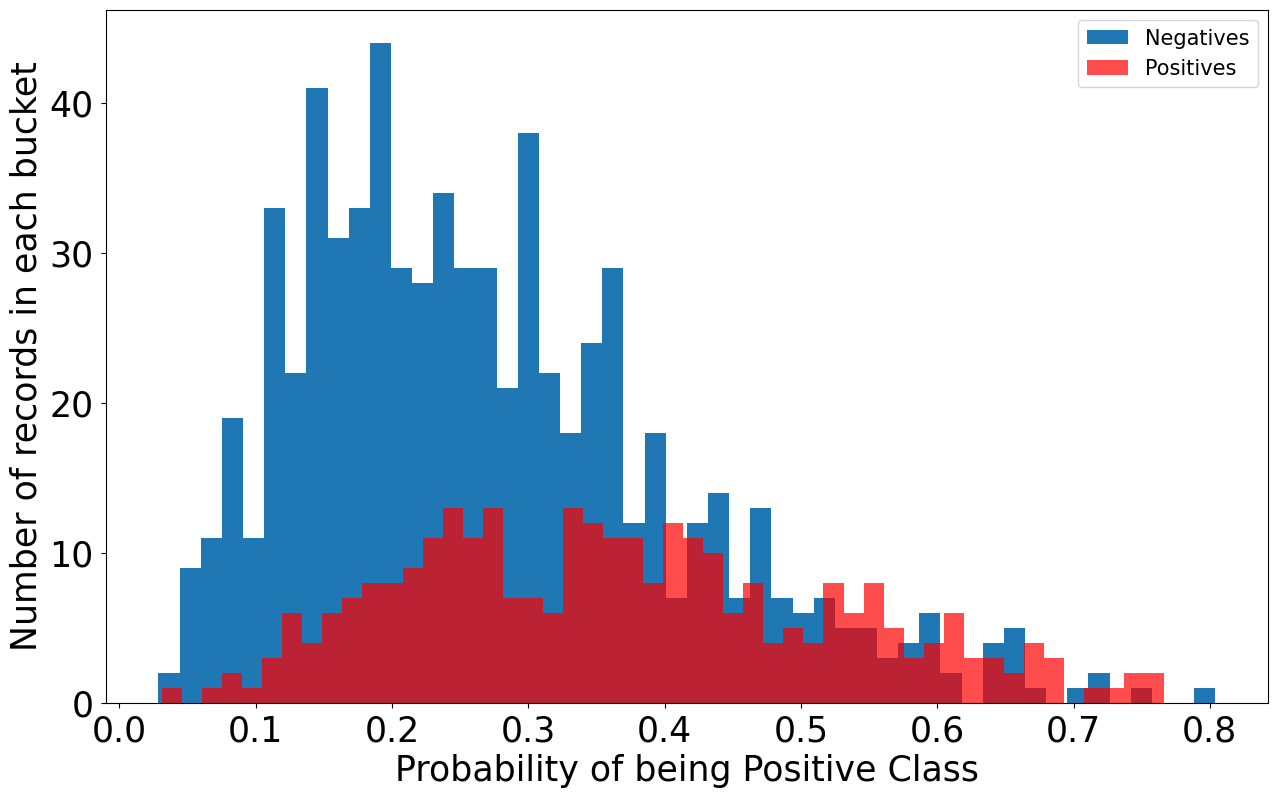

In [8]:
Umbrales.plot_prob(clf, X, y)


Precisión con umbral nuevo: 0.711
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       700
           1       0.58      0.13      0.21       300

    accuracy                           0.71      1000
   macro avg       0.65      0.54      0.52      1000
weighted avg       0.68      0.71      0.64      1000



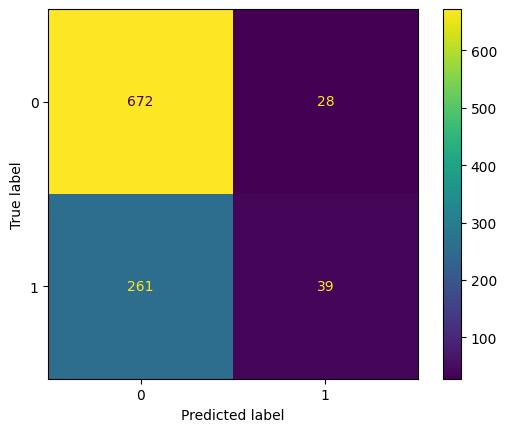

In [44]:
Umbrales.report_umbral(0.56, clf, X, y)

### Árbol de Decisión

In [9]:
clf=gb_clf

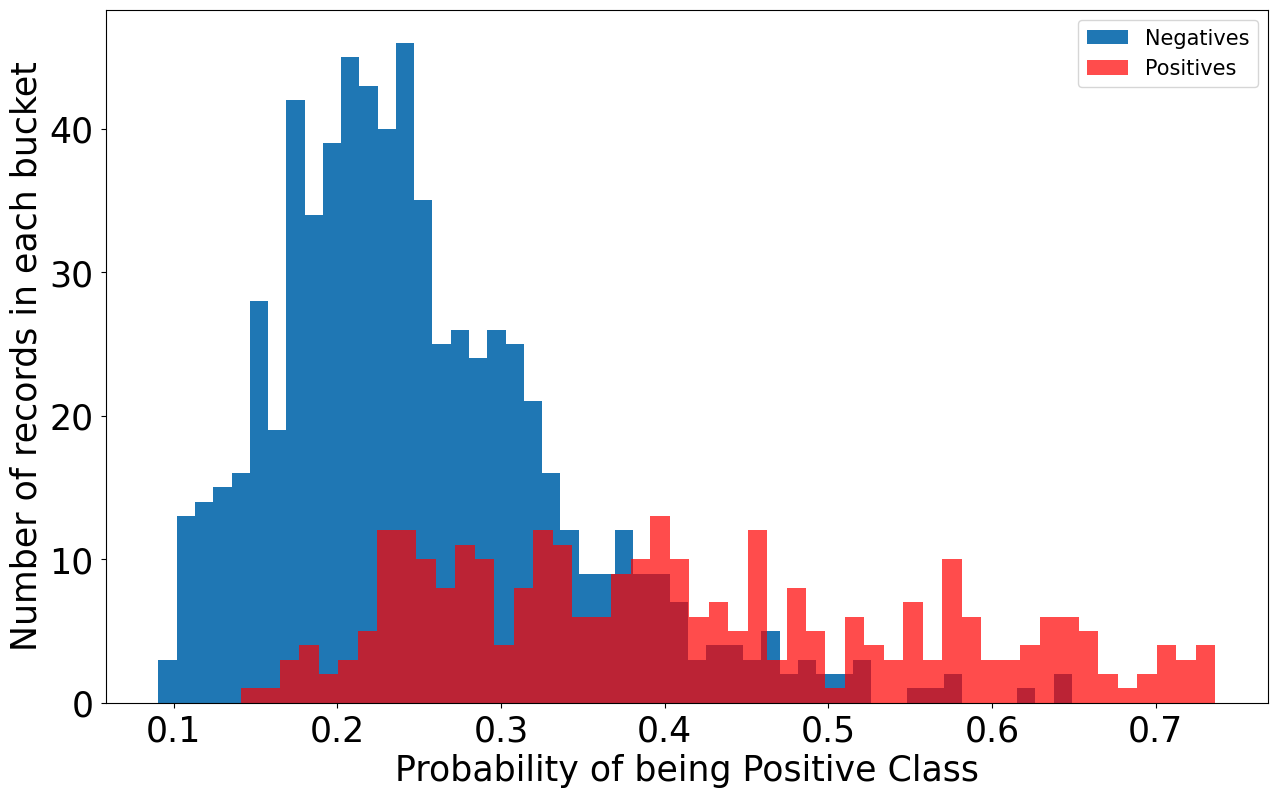

In [10]:
Umbrales.plot_prob(clf, X, y)


Precisión con umbral nuevo: 0.791
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       700
           1       0.81      0.39      0.53       300

    accuracy                           0.79      1000
   macro avg       0.80      0.68      0.70      1000
weighted avg       0.80      0.79      0.77      1000



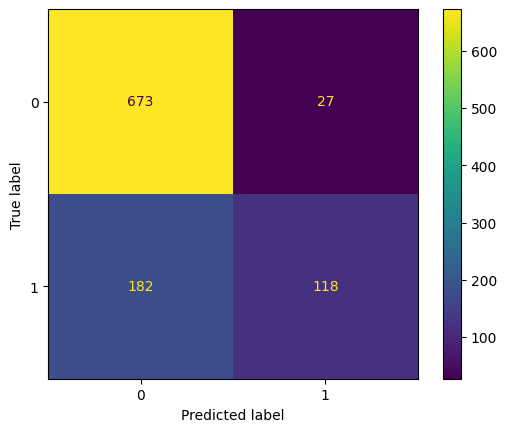

In [47]:
Umbrales.report_umbral(0.45, clf, X, y)

### Random Forest

In [11]:
clf=rf_clf

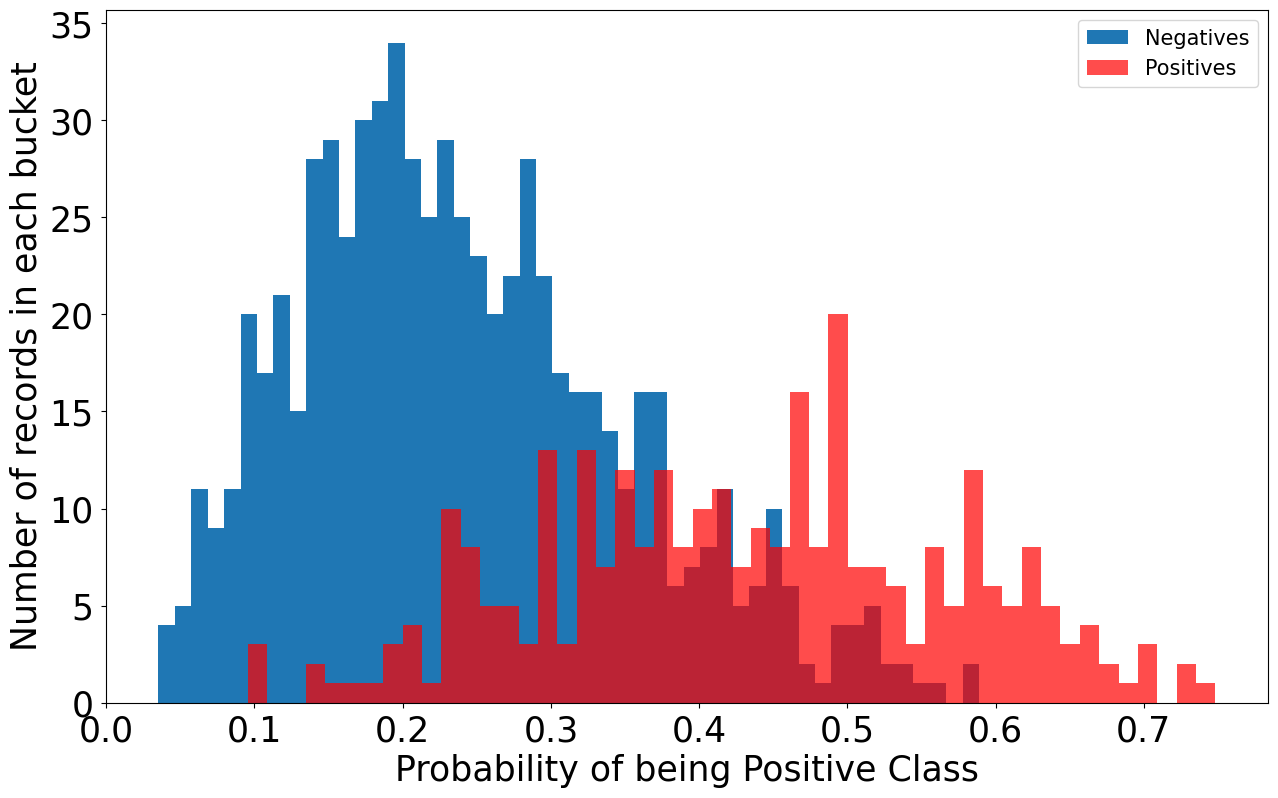

In [12]:
Umbrales.plot_prob(clf, X, y)


Precisión con umbral nuevo: 0.804
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       700
           1       0.70      0.60      0.65       300

    accuracy                           0.80      1000
   macro avg       0.77      0.75      0.76      1000
weighted avg       0.80      0.80      0.80      1000



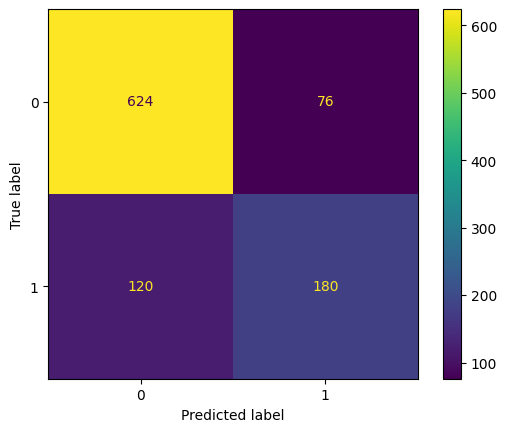

In [50]:
Umbrales.report_umbral(0.38, clf, X, y)

### Red Neuronal

In [14]:
clf=mlp_clf

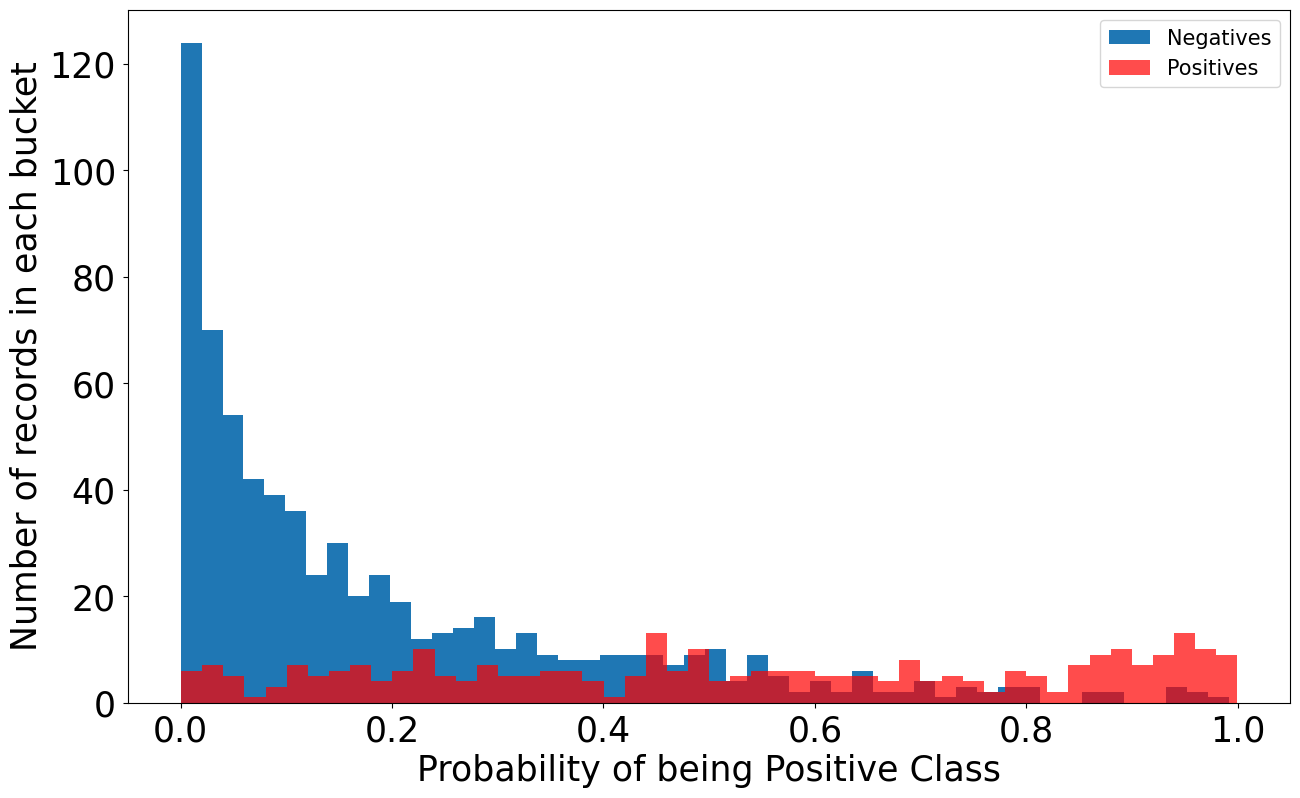

In [15]:
Umbrales.plot_prob(clf, X, y)


Precisión con umbral nuevo: 0.787
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       700
           1       0.75      0.43      0.55       300

    accuracy                           0.79      1000
   macro avg       0.77      0.69      0.71      1000
weighted avg       0.78      0.79      0.77      1000



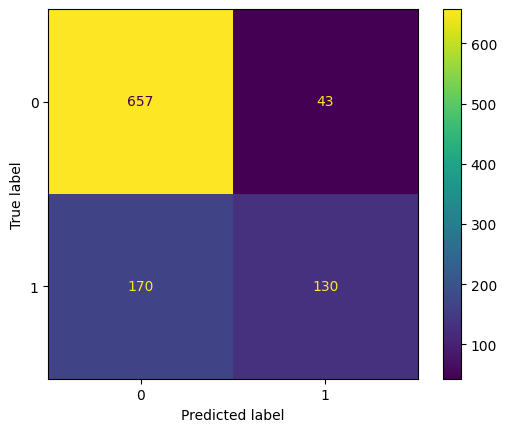

In [53]:
Umbrales.report_umbral(0.59, clf, X, y)


Precisión con umbral nuevo: 0.787
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       700
           1       0.65      0.63      0.64       300

    accuracy                           0.79      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.79      0.79      0.79      1000



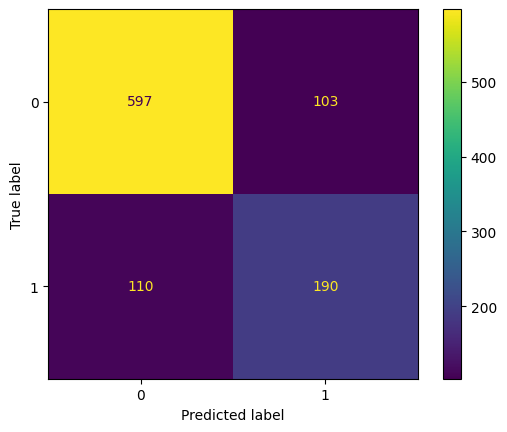

In [54]:
Umbrales.report_umbral(0.42, clf, X, y)

# Interpretabilidad

In [2]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.inspection import permutation_importance

Cargamos los datos.

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Cargar el modelo de regresión logística
with open('rg_lg.pkl', 'rb') as file:
    rg_lg = pickle.load(file)

# Cargar el modelo de Gradient Boosting Classifier
with open('gb_clf.pkl', 'rb') as file:
    gb_clf = pickle.load(file)

# Cargar el modelo de Random Forest Classifier
with open('rf_clf.pkl', 'rb') as file:
    rf_clf = pickle.load(file)

# Cargar el modelo de MLP Classifier
with open('mlp_clf.pkl', 'rb') as file:
    mlp_clf = pickle.load(file)

import random
random.seed(6)

nombre_archivo = "../../../GermanRisk/german_credit_data_prepared.csv"
datos_con_gen = pd.read_csv(nombre_archivo)
datos_leidos = datos_con_gen.copy()
datos_leidos = datos_leidos.drop('Sex_male', axis=1)
X = datos_leidos.drop('Risk_True', axis=1)  # Características
y = datos_leidos['Risk_True']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## PFI

### Regresión Logística

In [58]:
clf=rg_lg

In [59]:
r = permutation_importance(clf, X, y,
                            n_repeats=30,
                            random_state=0)

Text(0.5, 1.0, 'Permutation Importance')

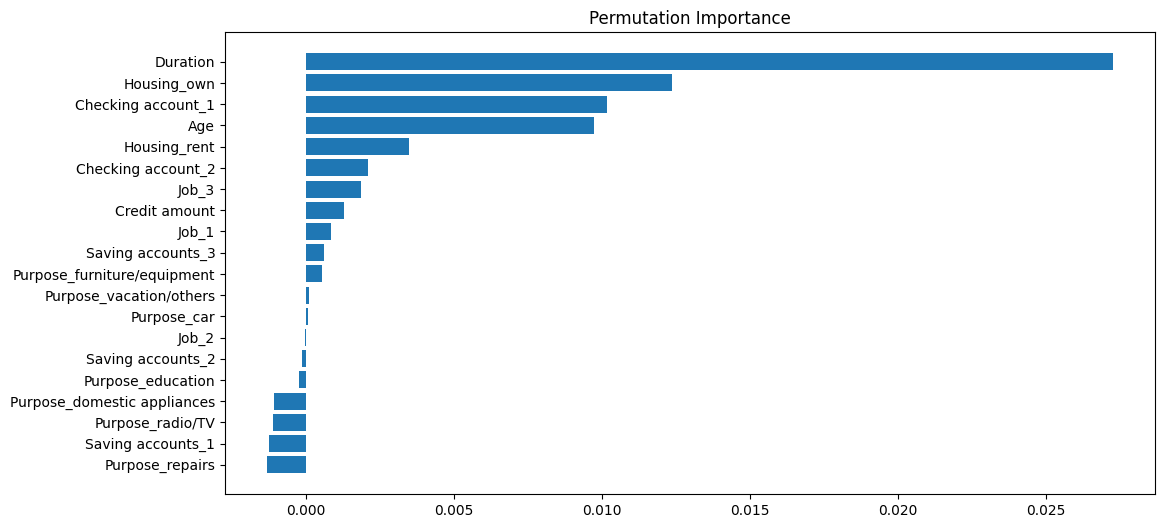

In [60]:
sorted_idx = r.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance')

### Random Forest

In [61]:
clf=rf_clf

In [62]:
r = permutation_importance(clf, X, y,
                            n_repeats=30,
                            random_state=0)

Text(0.5, 1.0, 'Permutation Importance')

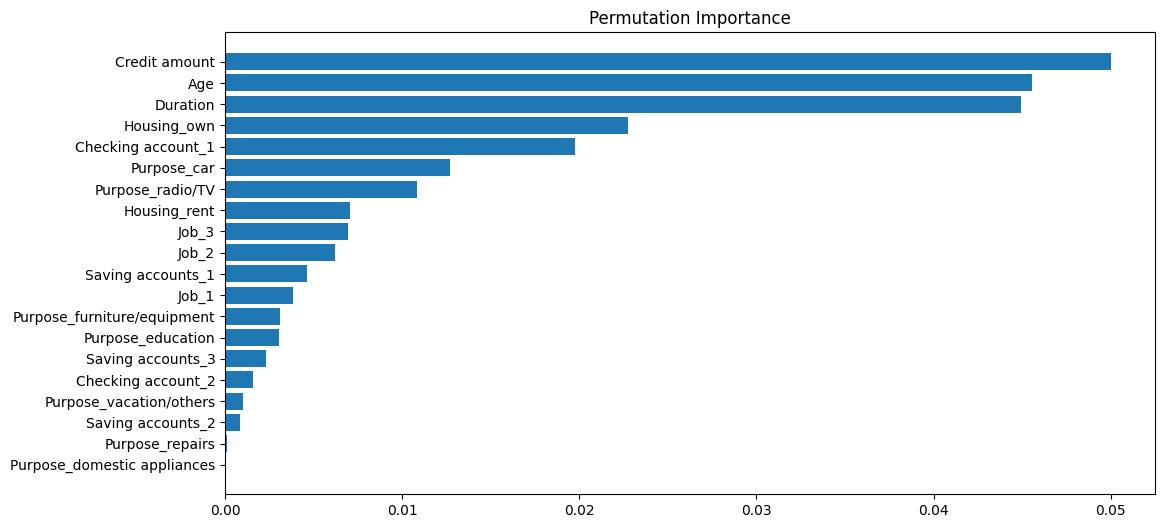

In [63]:
sorted_idx = r.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance')

### Red neuronal

In [64]:
clf=mlp_clf

In [65]:
r = permutation_importance(clf, X, y,
                            n_repeats=30,
                            random_state=0)

Text(0.5, 1.0, 'Permutation Importance')

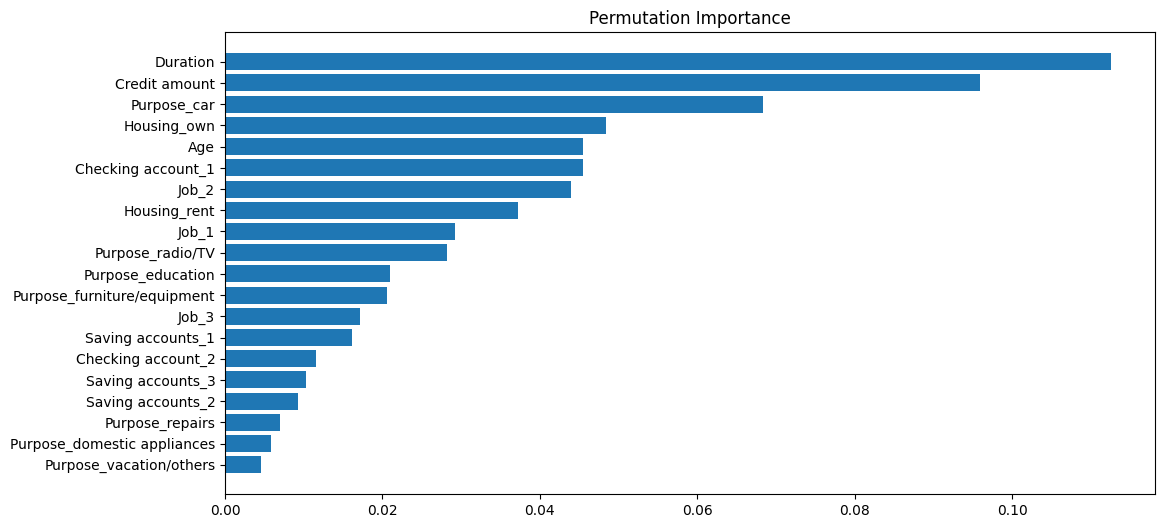

In [66]:
sorted_idx = r.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance')

Vemos que los resultados son enormemente parecidos.

## PDP

### Random Forest

In [4]:
clf=rf_clf

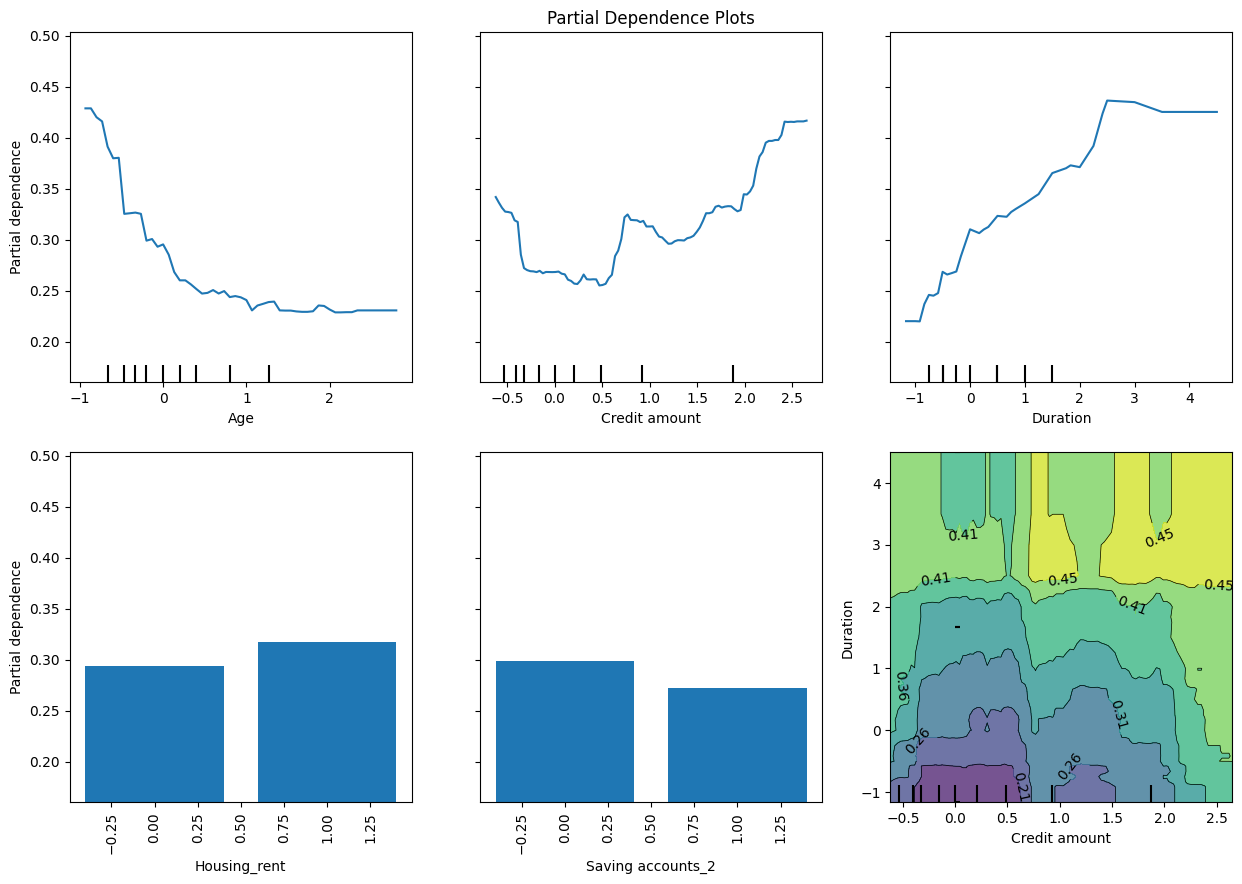

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=clf,
    X=X,
    features=(0, 1, 2, 7, 9, (1,2)), # the features to plot
    categorical_features = [7, 9], # categorical features
    random_state=5,
    ax=ax,
)
plt.show()

Esto indica que el efecto marginal, la esperanza obtenida mediante el promedio de los valores variando la variable a estudiar, de las variables es la siguiente:
 - El incremento de la edad reduce el riesgo, hasta que se llega a una edad alta donde realmente ya no afecta al riesgo (línea muy horizontal).
 - La cántidad de crédito individualmente parece que al principio disminuye el riesgo hasta llegar a una cantidad no demasiado baja (puede estar afectado por el número de muestras) y luego aumenta el riesgo como esperábamos.
 - La duración del crédito es interesante como parece que aumenta el riesgo hasta llegar a una duración bastante alta, a partir de ahí parece que se estanca.
 - El hecho de poseer una casa ya disminuye el riesgo.
 - El hecho de tener pocos fondos en la cuenta aumenta el riesgo.
 - Para la cántidad el crédito y la duración hemos estudiado las dos variables combinadas y podemos observar que parece que los créditos bajos y con poca duración tienen muy poco riesgo y que los créditos altos o con mucha duración tienen más riesgo (no parece que hayamos visto una interacción especial entre estos dos valores).

### Red Neuronal

In [69]:
clf=mlp_clf

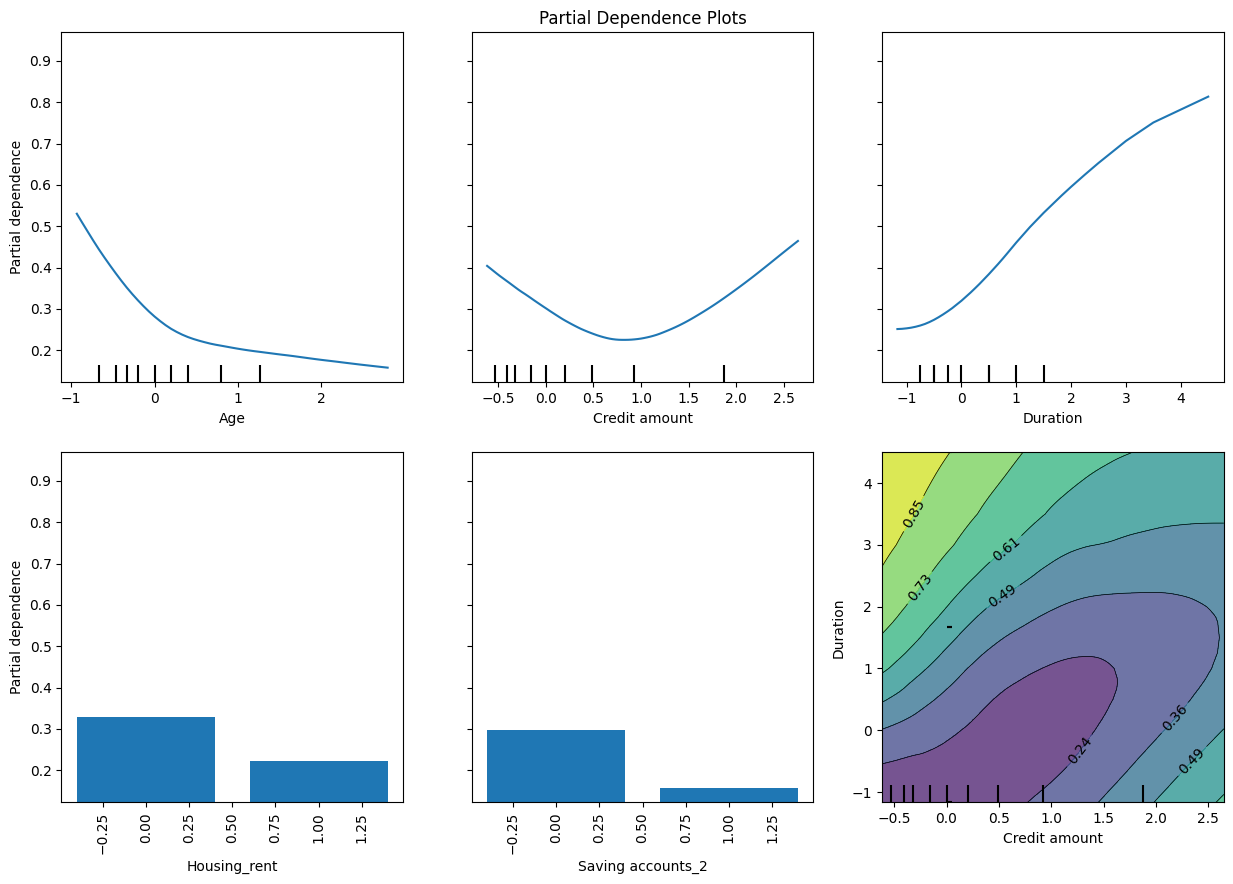

In [70]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=clf,
    X=X,
    features=(0, 1, 2, 7, 9, (1,2)), # the features to plot
    categorical_features = [7, 9], # categorical features
    random_state=5,
    ax=ax,
)
plt.show()

Esto indica que el efecto marginal, la esperanza obtenida mediante el promedio de los valores variando la variable a estudiar, de las variables es la siguiente:
 - Al principio el incremento de la edad dismimuye mucho el riesgo, luego menos.
 - Parece que el riesgo es mayor para créditos muy bajos o muy altos.
 - La duración aumenta el riesgo.
 - En cuanto a poseer ya una casa y los ahorros parece lógico lo que se muestra: ambos afectan negativamente a aumentar el riesgo (es decir no estar de alquiler en una casa y no tener pocos aho).
 - Para la cántidad el crédito y la duración si las miramos combinadas podemos observar que hay cierta relación lógica (aumentar la duración y la cantidad del riesgo en cierto factor no afecta al riesgo, lo que afecta es aumentar sólo una de las dos).

In [6]:
#results = partial_dependence(clf, X, features=[0, 1, 2, 6])

## ALE

In [7]:
from alepython import ale_plot
feature_list=['Age','Credit amount','Duration',['Credit amount','Duration']]

### Random Forest

In [8]:
clf=rf_clf

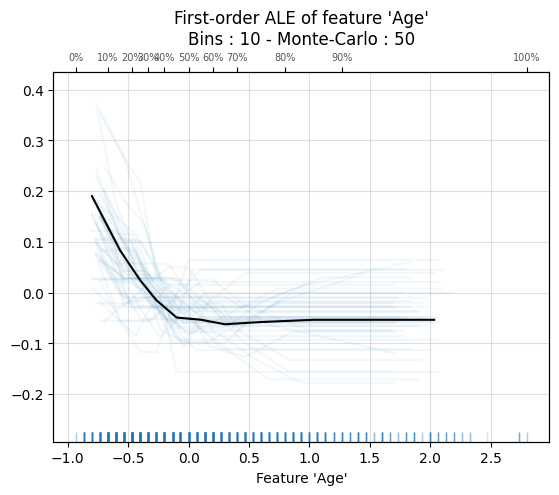

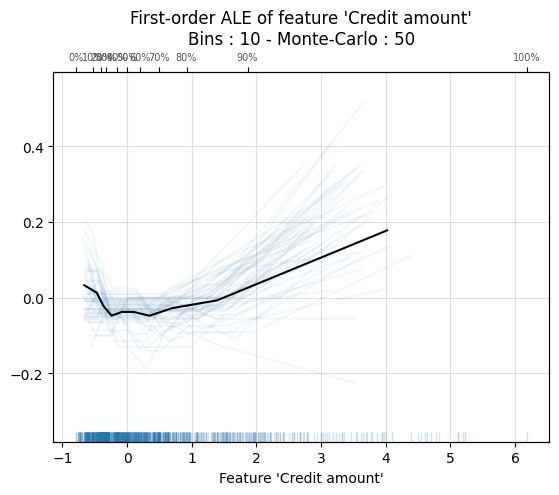

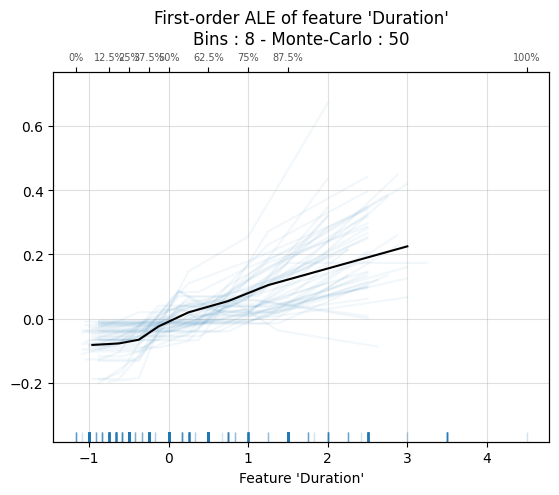

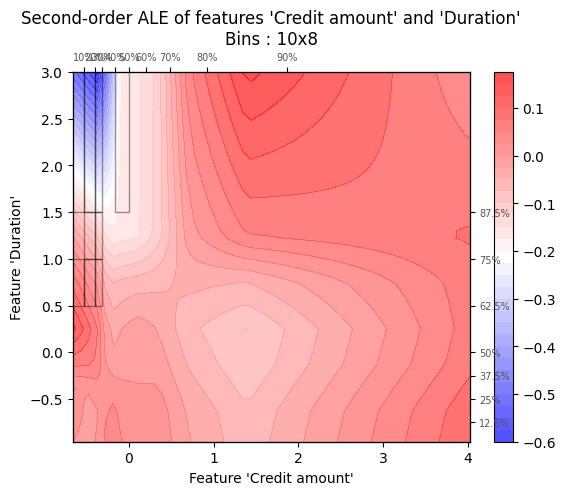

In [9]:
for feature in feature_list:
    # Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50).
    ale_plot(clf, X, feature, monte_carlo=True)

Lo que aportan los ALE Plots respecto a los PDP es que ahora nos aseguramos de tomar valores realistas (se toman los valores condicionados a la variable que estamos estudiando, si estudiamos la duración para un valor alto PDP toma cantidades de créditos muy bajos para hacer el promedio y ALE no) y que ahora intentamos aislar la característica que estamos estudiando:
 - Igual que con PDP el incremento de la edad reduce el riesgo, hasta que se llega a la edad media a partir de la cual realmente ya no afecta al riesgo (línea muy horizontal).
 - La cántidad de crédito se ve más limpia ahora, igual que con PDP al principio disminuye el riesgo hasta llegar a una cantidad no demasiado baja y luego aumenta el riesgo como esperábamos.
 - Hay un cambio en la duración del crédito, parece que aumenta el riesgo de manera lineal (podría verse afectado por menos muestras de créditos más largos).
 - En cuanto a la relación entre la cántidad y la duración del riesgo hay poco que contar.

### Red Neuronal

In [10]:
clf=mlp_clf

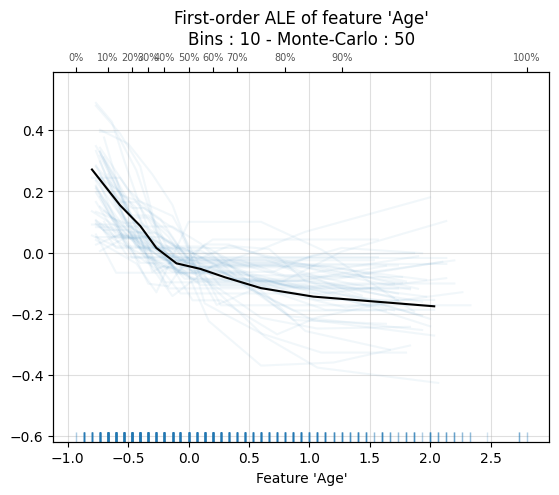

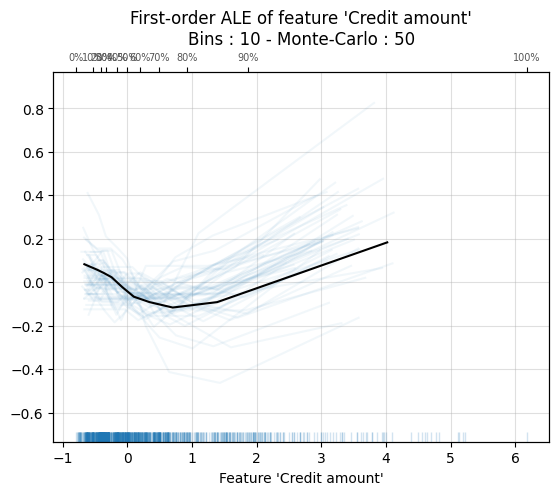

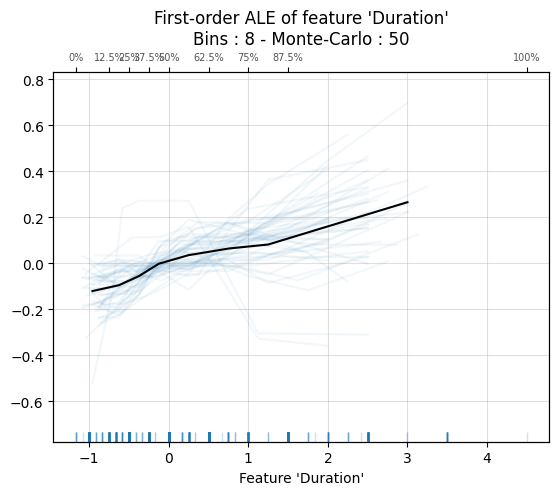

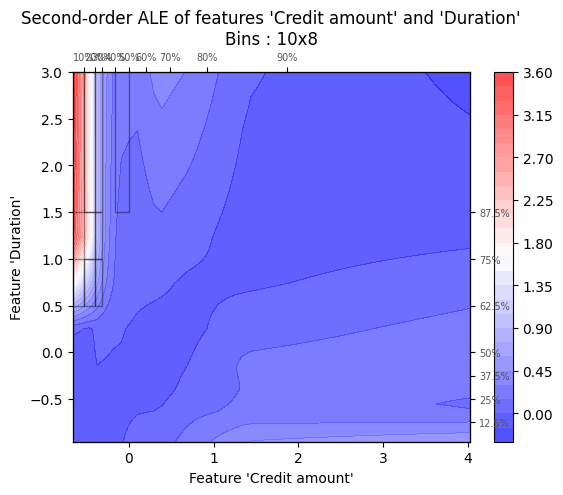

In [11]:
for feature in feature_list:
    # Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50).
    ale_plot(clf, X, feature, monte_carlo=True)

Lo que aportan los ALE Plots respecto a los PDP es que ahora nos aseguramos de tomar valores realistas (se toman los valores condicionados a la variable que estamos estudiando, si estudiamos la duración para un valor alto PDP toma cantidades de créditos muy bajos para hacer el promedio y ALE no) y que ahora intentamos aislar la característica que estamos estudiando:
- Muy similar todo al random forest.


## SHAP

In [3]:
import shap

np.save('X_test.npy', X_test)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
shap.initjs()

### Random Forest

In [5]:
clf=rf_clf
clf

RandomForestClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=10)

In [18]:
import shap
import pickle
import numpy as np

# Sample 1000 background data samples
background_samples = shap.sample(X_test, 50)

# Guardar los datos de fondo
np.save('SHAP_rf/background_samples.npy', background_samples)

# Create the explainer
explainer = shap.KernelExplainer(clf.predict_proba, background_samples)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Guardar el explainer y los SHAP values
with open('SHAP_rf/explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

np.save('SHAP_rf/shap_values.npy', shap_values)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [05:06<00:00,  1.53s/it]


In [6]:
import pickle
import numpy as np

# Cargar los datos de fondo
background_samples = np.load('SHAP_rf/background_samples.npy')

# Cargar el explainer
with open('SHAP_rf/explainer.pkl', 'rb') as f:
    explainer = pickle.load(f)

# Cargar los SHAP values
shap_values = np.load('SHAP_rf/shap_values.npy')


In [7]:
shap.initjs()

Visualización general de los valores SHAP.

In [21]:
clf.feature_names_in_

array(['Age', 'Credit amount', 'Duration', 'Job_1', 'Job_2', 'Job_3',
       'Housing_own', 'Housing_rent', 'Saving accounts_1',
       'Saving accounts_2', 'Saving accounts_3', 'Checking account_1',
       'Checking account_2', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment',
       'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others'],
      dtype=object)

In [22]:
# Definir nombres de características y etiquetas de destino (cáncer como ejemplo)
feature_names = ['Age', 'Credit amount', 'Duration', 'Job_1', 'Job_2', 'Job_3'
                 , 'Housing_own', 'Housing_rent', 'Saving accounts_1',
       'Saving accounts_2', 'Saving accounts_3', 'Checking account_1',
       'Checking account_2', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment',
       'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others']  # Lista de nombres de características
target_names = ['y_yes']   # Lista de nombres de etiquetas objetivo

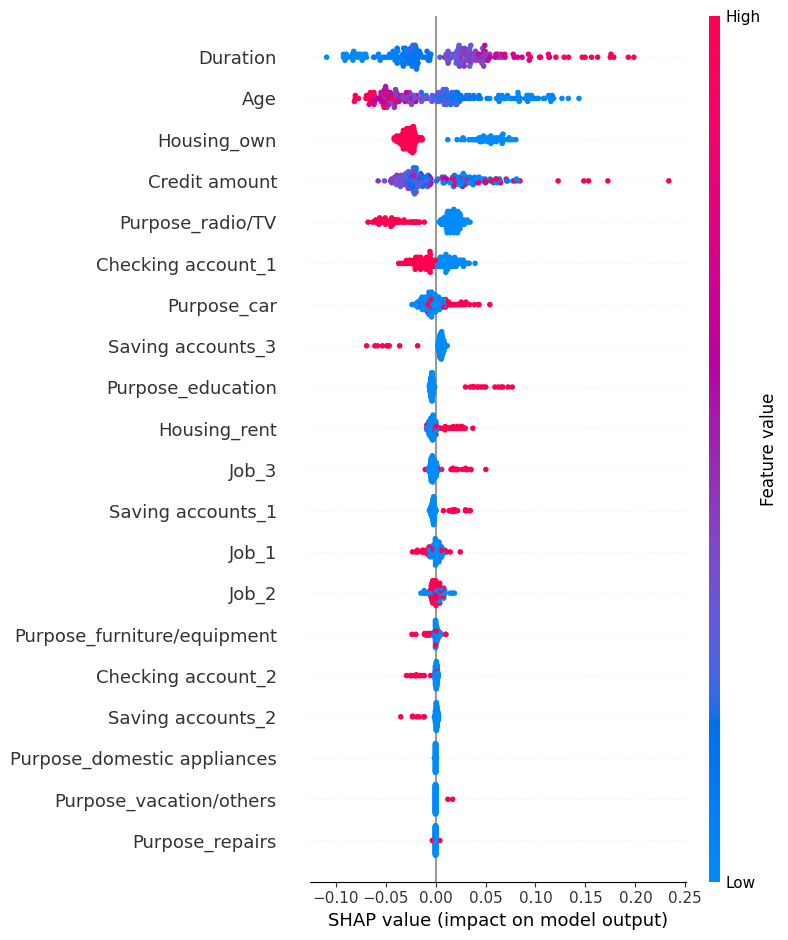

In [23]:
i=1
shap.summary_plot(shap_values[i], features=X_test, 
                   feature_names=feature_names)

In [39]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

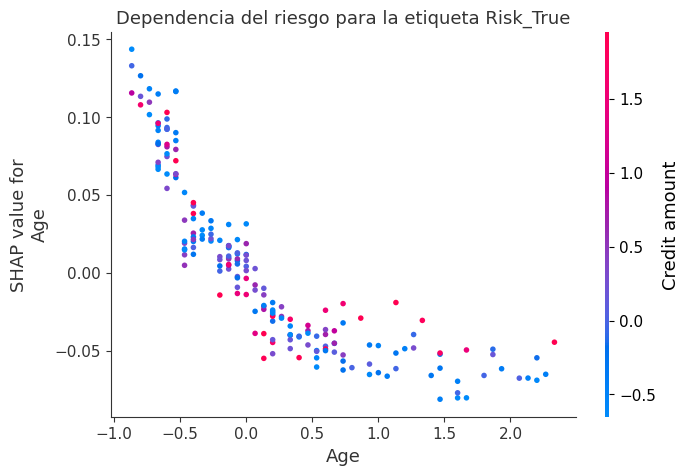

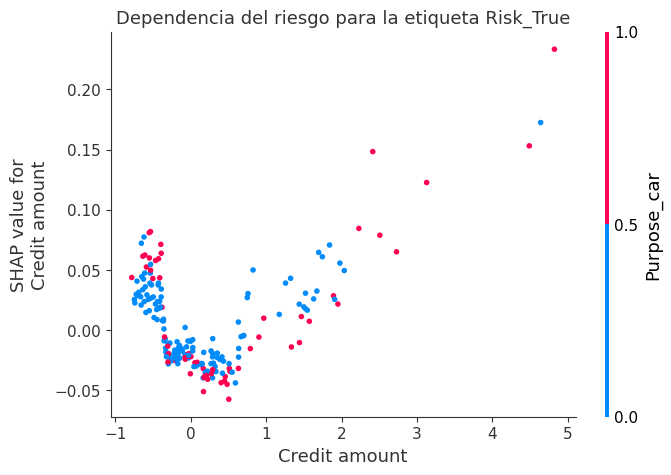

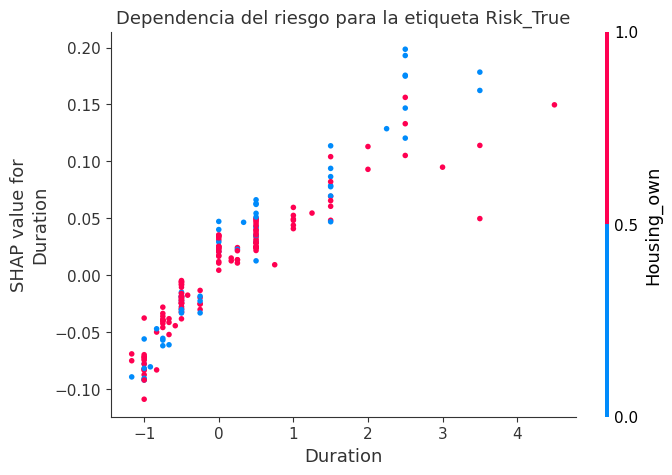

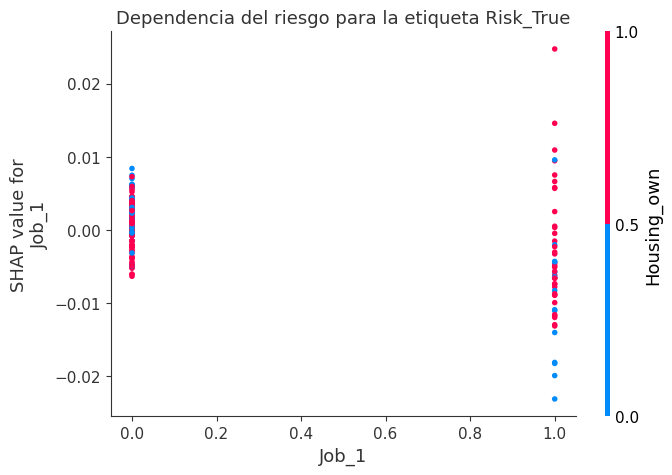

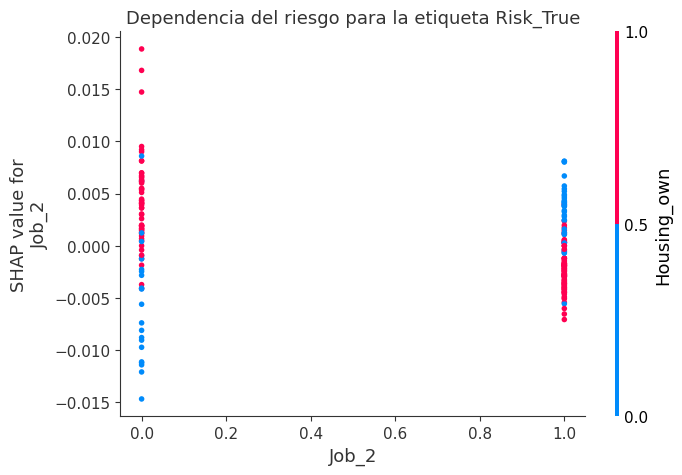

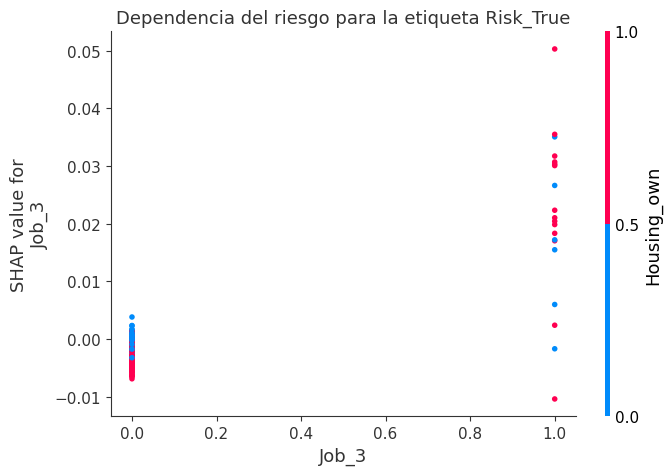

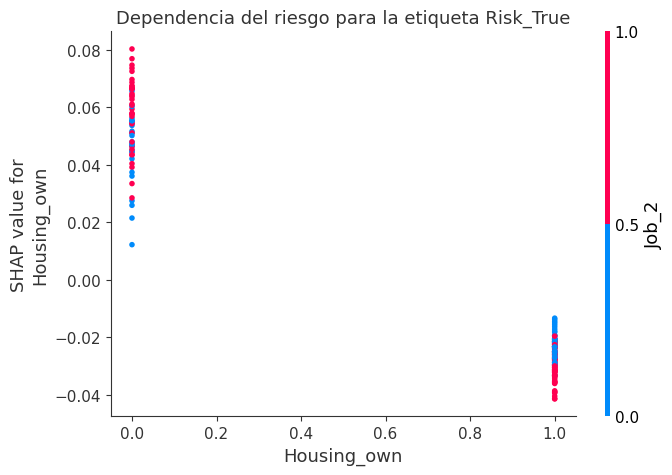

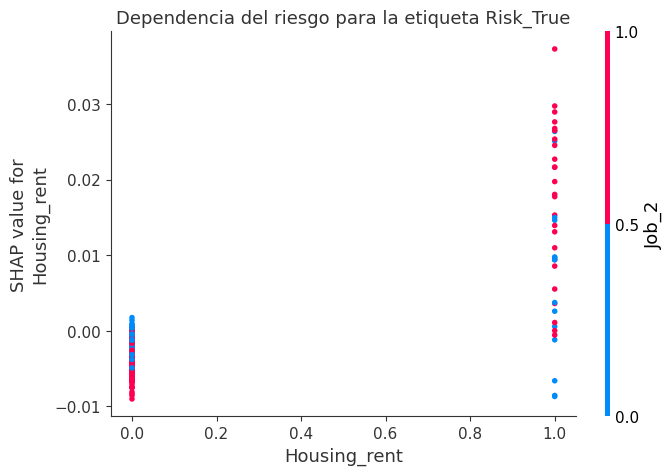

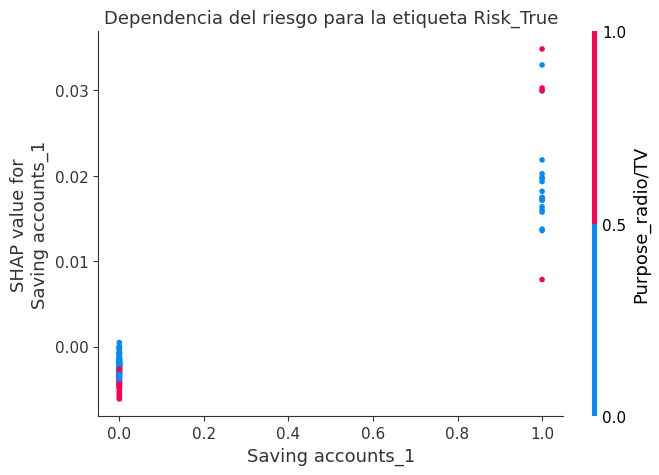

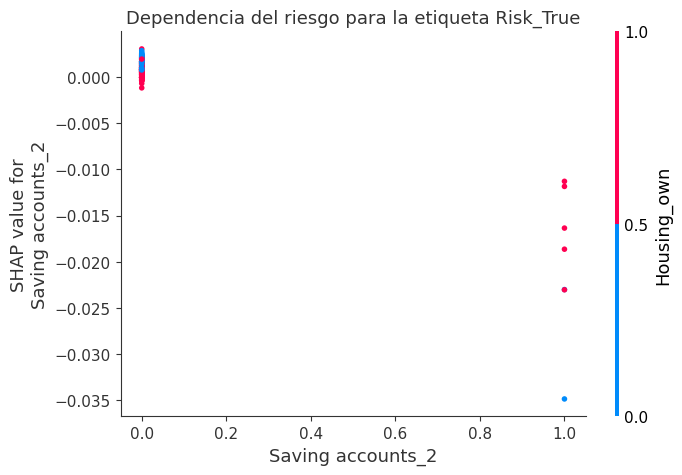

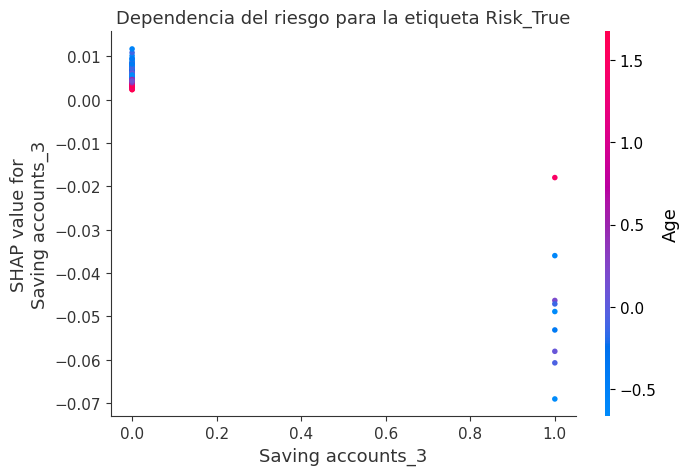

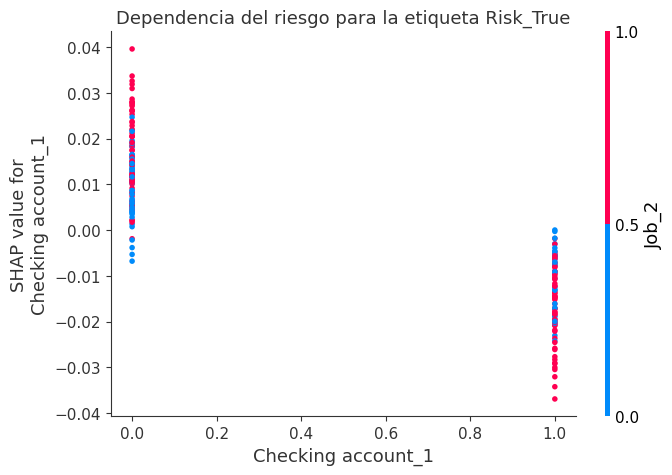

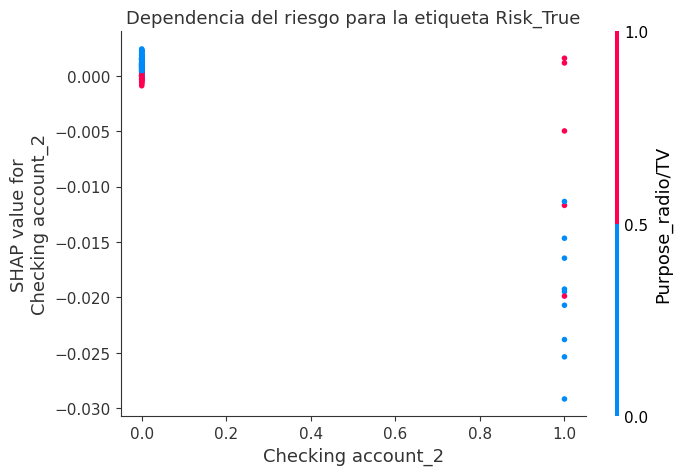

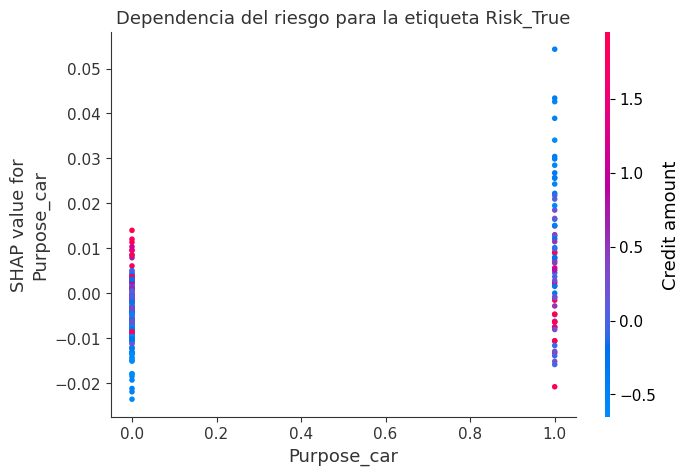

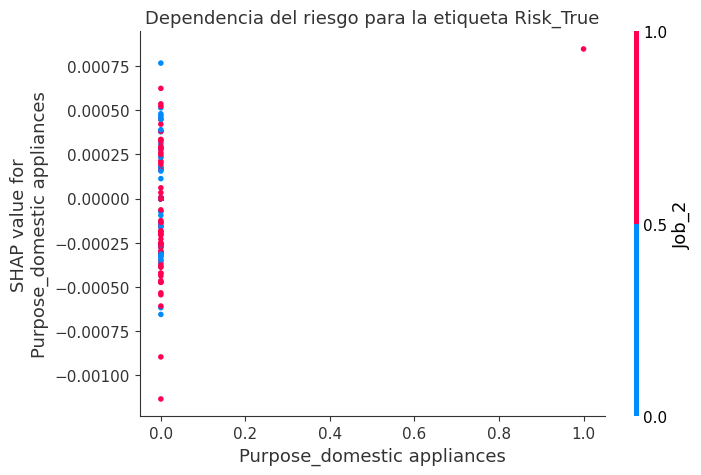

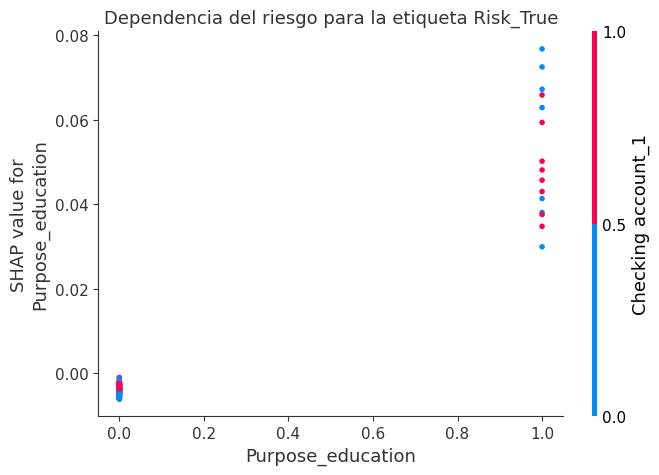

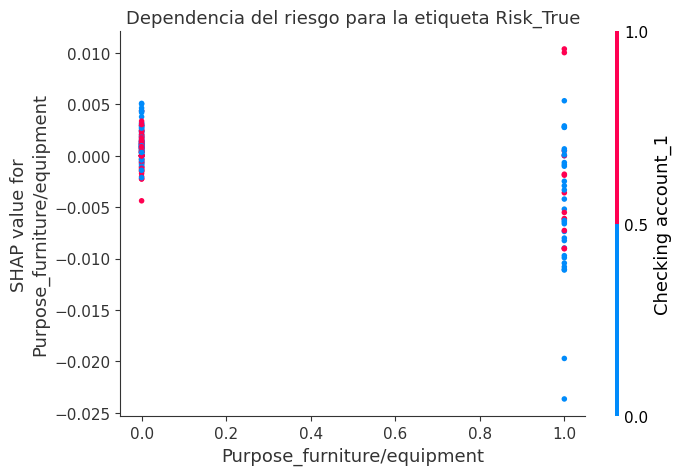

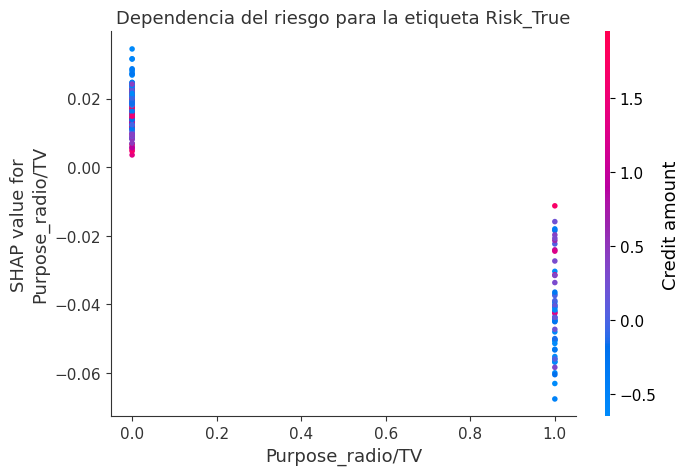

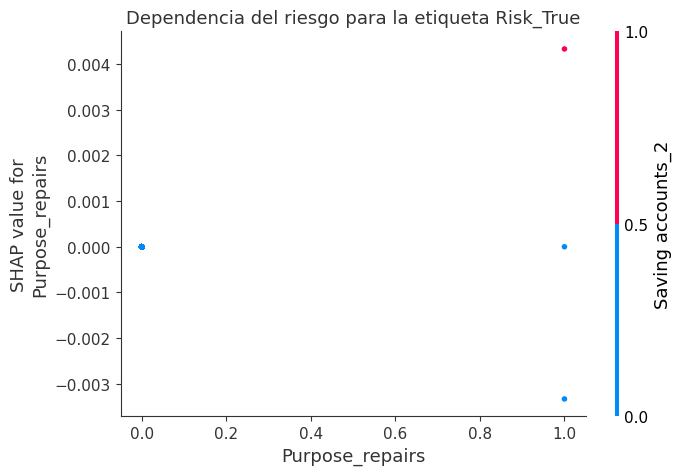

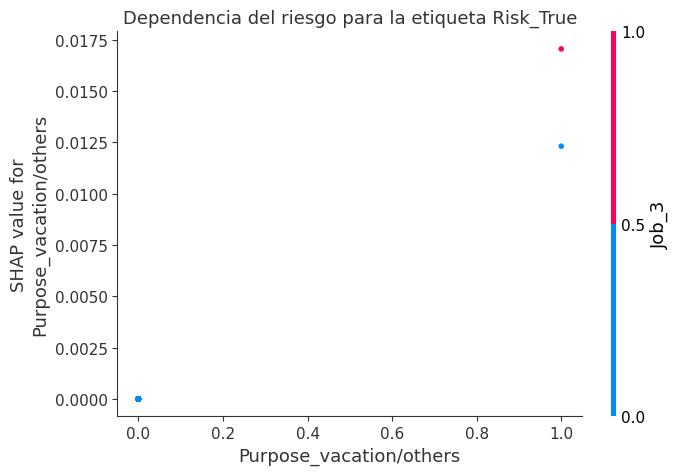

In [20]:
target_names=['Risk_True']

# Visualizar gráficos de dependencia para cada característica y cada etiqueta objetivo
for feature_index, clf.fe in enumerate(clf.feature_names_in_):
    for target_label, target_name in enumerate(target_names):
        shap.dependence_plot(
            feature_index, 
            shap_values[1], 
            features=X_test, 
            feature_names=clf.feature_names_in_,
            title=f"Dependencia del riesgo para la etiqueta {target_name}"
        )

plt.show()

### Red Neuronal

In [21]:
clf=mlp_clf
clf

MLPClassifier(hidden_layer_sizes=(9, 9), max_iter=1000, random_state=42)

In [29]:
import shap
import pickle
import numpy as np

# Sample 1000 background data samples
background_samples = shap.sample(X_test, 50)

# Guardar los datos de fondo
np.save('SHAP_mlp/background_samples.npy', background_samples)

# Create the explainer
explainer = shap.KernelExplainer(clf.predict_proba, background_samples)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Guardar el explainer y los SHAP values
with open('SHAP_mlp/explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

np.save('SHAP_mlp/shap_values.npy', shap_values)

100%|██████████| 200/200 [02:34<00:00,  1.29it/s]


In [22]:
import pickle
import numpy as np

# Cargar los datos de fondo
background_samples = np.load('SHAP_mlp/background_samples.npy')

# Cargar el explainer
with open('SHAP_mlp/explainer.pkl', 'rb') as f:
    explainer = pickle.load(f)

# Cargar los SHAP values
shap_values = np.load('SHAP_mlp/shap_values.npy')


In [23]:
shap.initjs()

Visualización general de los valores SHAP.

In [32]:
clf.feature_names_in_

array(['Age', 'Credit amount', 'Duration', 'Job_1', 'Job_2', 'Job_3',
       'Housing_own', 'Housing_rent', 'Saving accounts_1',
       'Saving accounts_2', 'Saving accounts_3', 'Checking account_1',
       'Checking account_2', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment',
       'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others'],
      dtype=object)

In [33]:
# Definir nombres de características y etiquetas de destino (cáncer como ejemplo)
feature_names = ['Age', 'Credit amount', 'Duration', 'Job_1', 'Job_2', 'Job_3'
                 , 'Housing_own', 'Housing_rent', 'Saving accounts_1',
       'Saving accounts_2', 'Saving accounts_3', 'Checking account_1',
       'Checking account_2', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment',
       'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others']  # Lista de nombres de características
target_names = ['y_yes']   # Lista de nombres de etiquetas objetivo

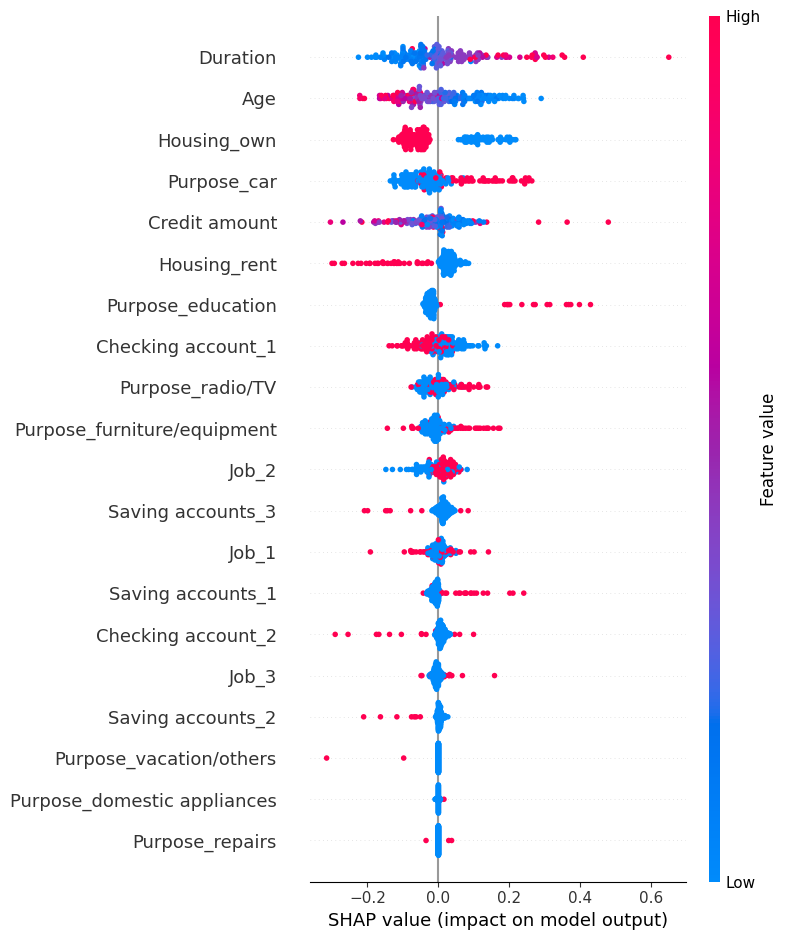

In [34]:
i=1
shap.summary_plot(shap_values[i], features=X_test, 
                   feature_names=feature_names)

In [36]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

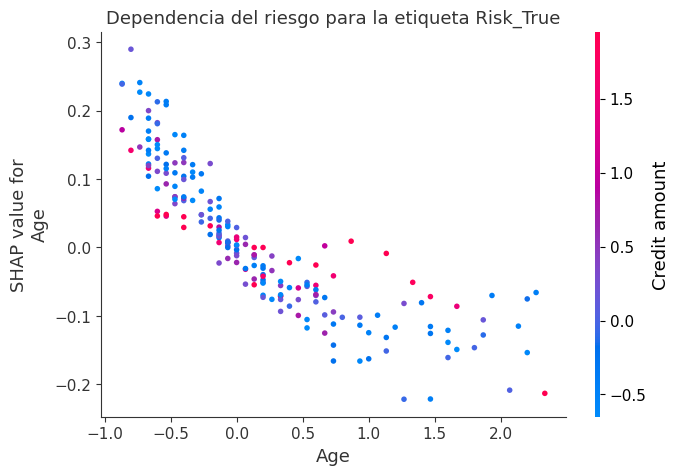

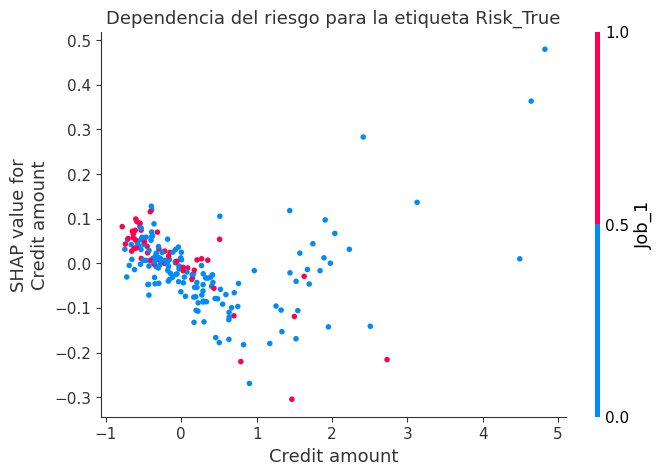

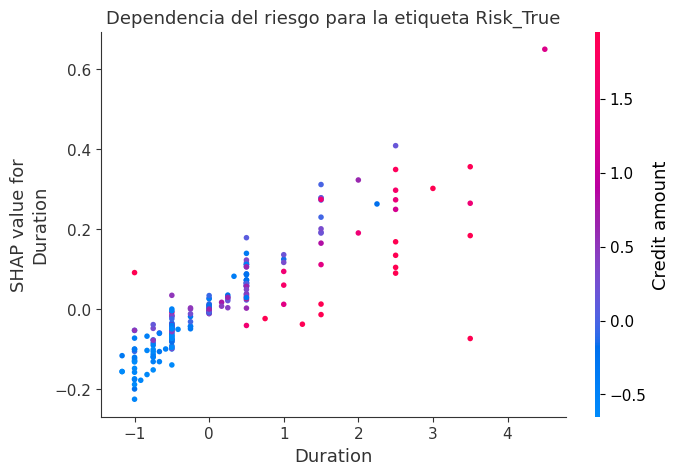

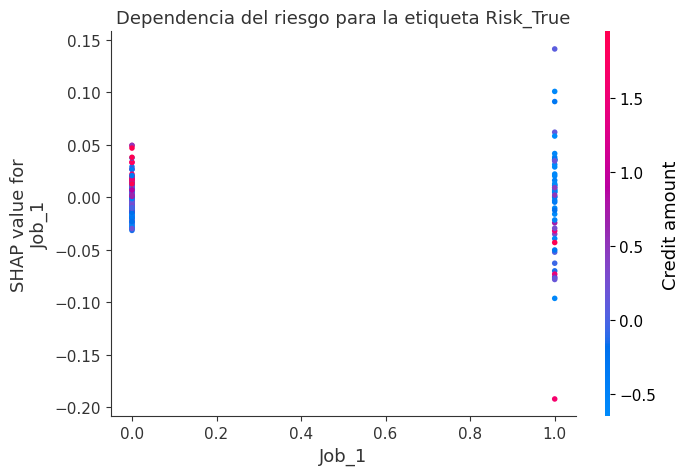

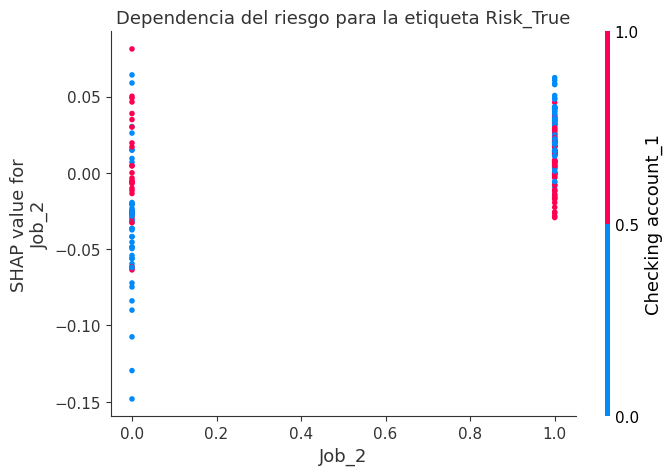

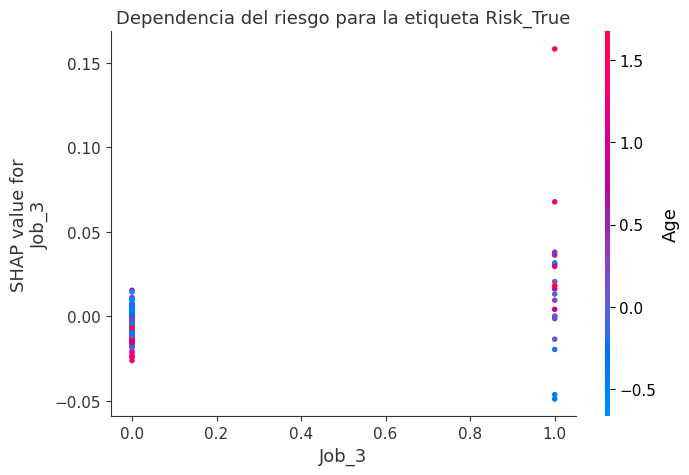

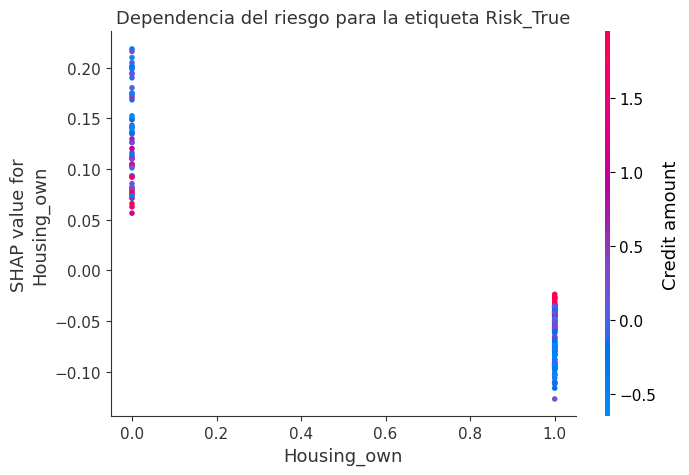

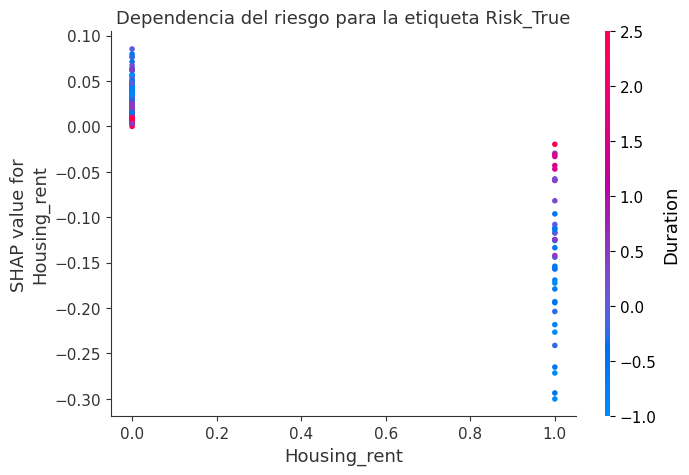

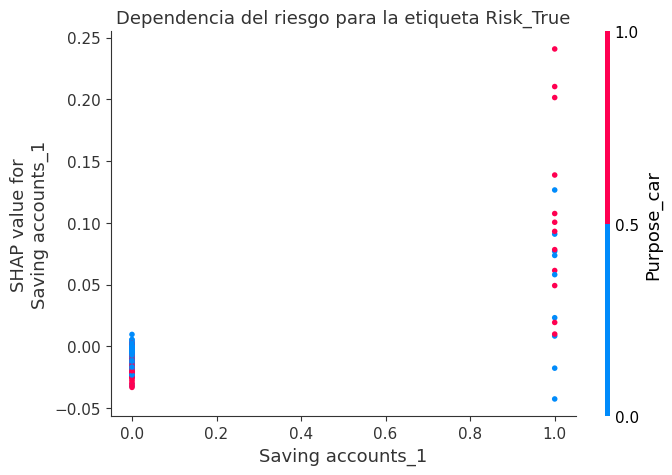

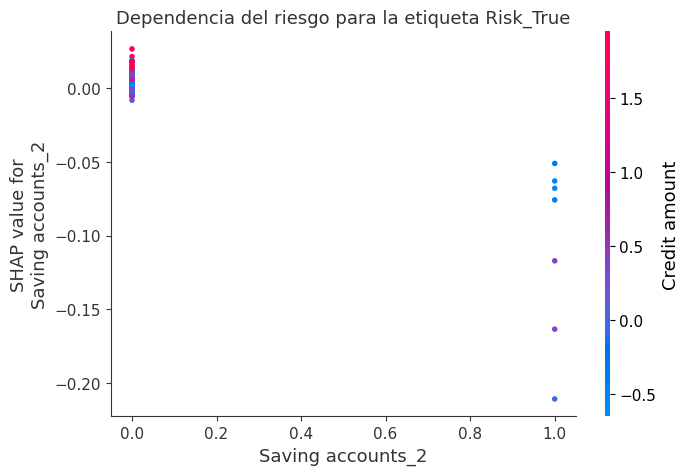

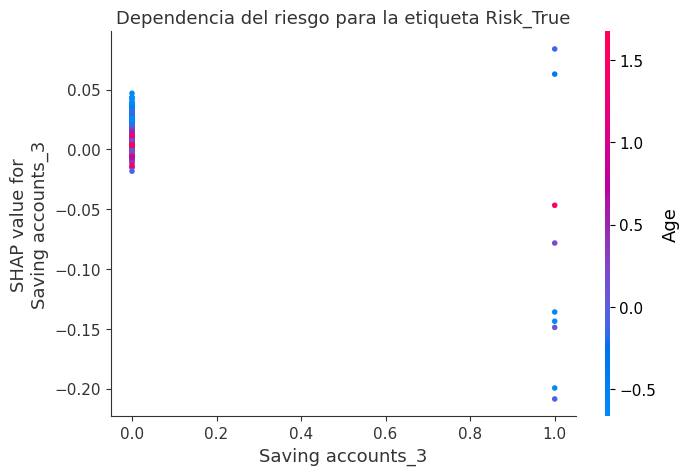

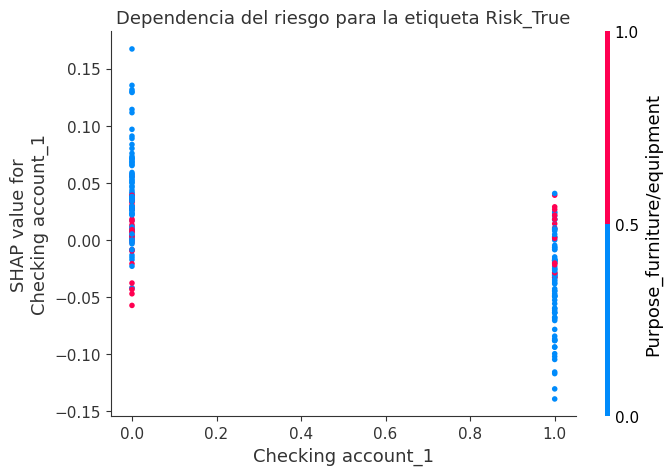

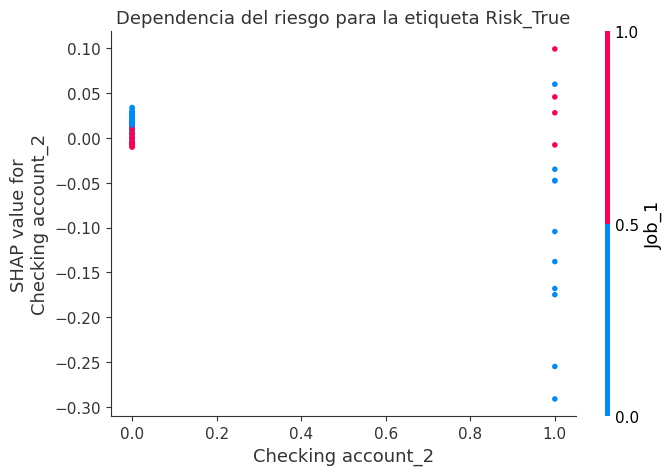

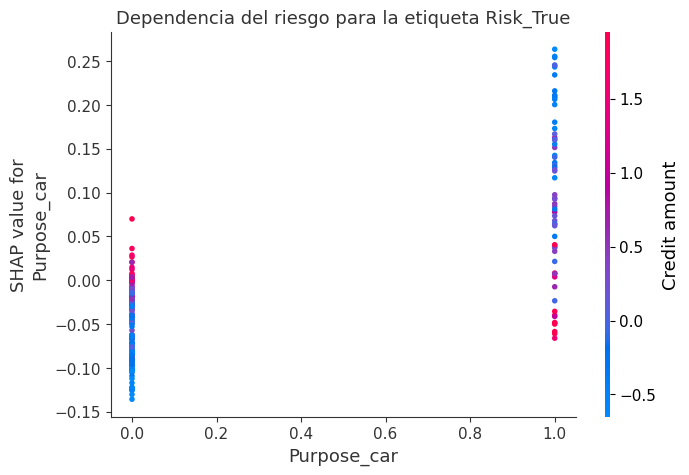

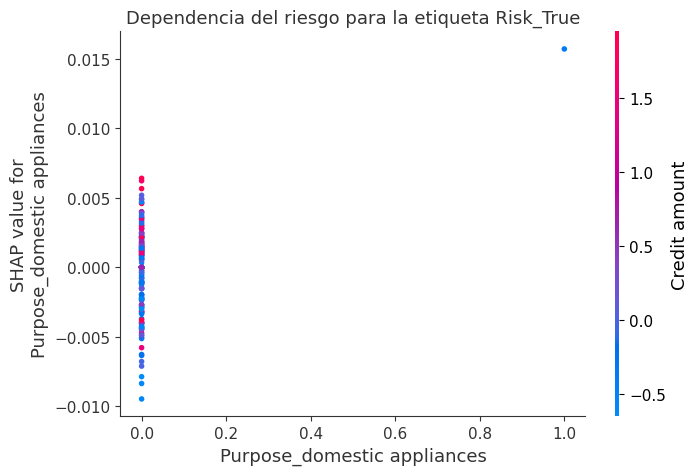

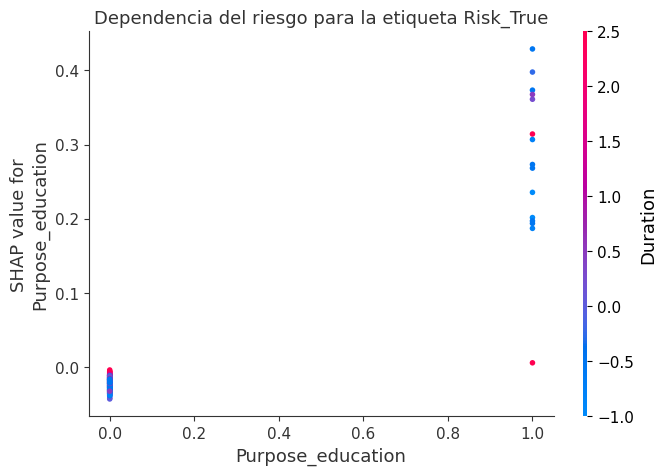

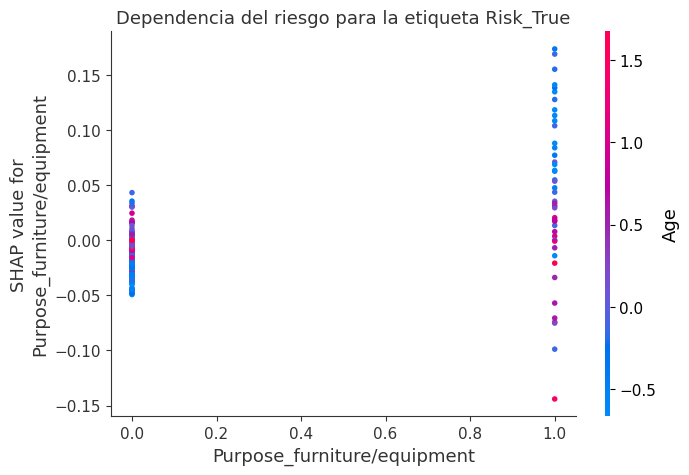

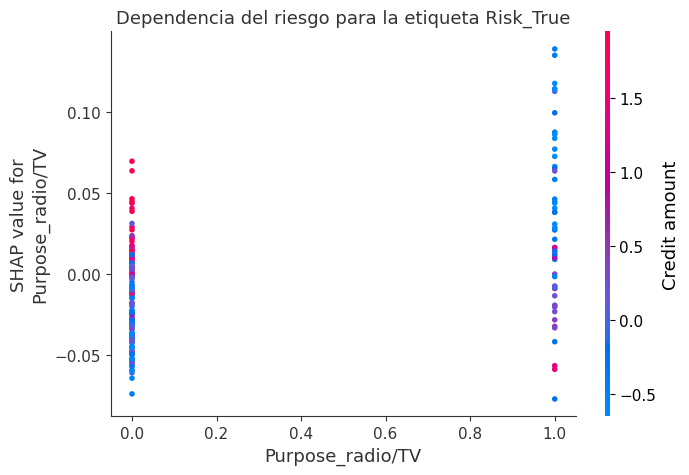

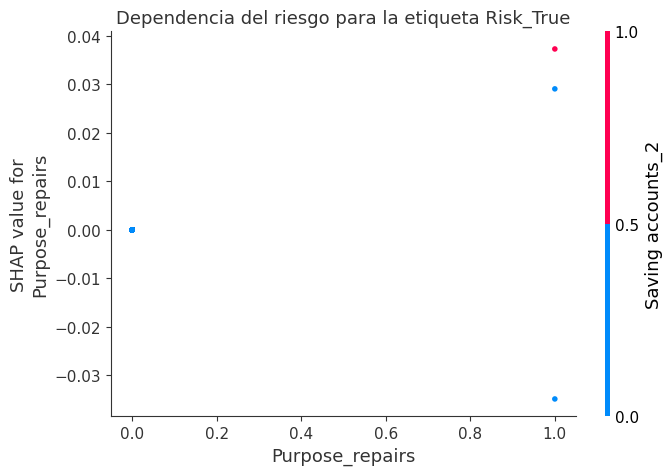

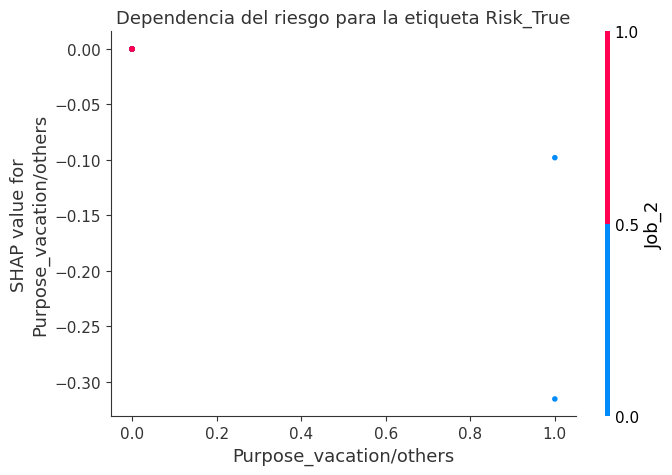

In [24]:
target_names=['Risk_True']

# Visualizar gráficos de dependencia para cada característica y cada etiqueta objetivo
for feature_index, clf.fe in enumerate(clf.feature_names_in_):
    for target_label, target_name in enumerate(target_names):
        shap.dependence_plot(
            feature_index, 
            shap_values[1], 
            features=X_test, 
            feature_names=clf.feature_names_in_,
            title=f"Dependencia del riesgo para la etiqueta {target_name}"
        )

plt.show()

# ANEXOS

## KERAS

In [ ]:
import keras

model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics=keras.metrics.AUC()
             )

history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_test, y_test))

Epoch 1/500
1/1 [==============================] - 1s 795ms/step - loss: 0.6987 - auc_2: 0.3974 - val_loss: 0.6907 - val_auc_2: 0.3788
Epoch 2/500
1/1 [==============================] - 0s 42ms/step - loss: 0.6801 - auc_2: 0.4324 - val_loss: 0.6882 - val_auc_2: 0.3808
Epoch 3/500
1/1 [==============================] - 0s 28ms/step - loss: 0.6908 - auc_2: 0.4046 - val_loss: 0.6857 - val_auc_2: 0.3818
Epoch 4/500
1/1 [==============================] - 0s 29ms/step - loss: 0.6895 - auc_2: 0.3961 - val_loss: 0.6834 - val_auc_2: 0.3806
Epoch 5/500
1/1 [==============================] - 0s 31ms/step - loss: 0.6770 - auc_2: 0.4278 - val_loss: 0.6810 - val_auc_2: 0.3815
Epoch 6/500
1/1 [==============================] - 0s 30ms/step - loss: 0.6711 - auc_2: 0.4427 - val_loss: 0.6788 - val_auc_2: 0.3815
Epoch 7/500
1/1 [==============================] - 0s 43ms/step - loss: 0.6732 - auc_2: 0.4375 - val_loss: 0.6765 - val_auc_2: 0.3826
Epoch 8/500
1/1 [==============================] - 0s 30ms/st

In [ ]:
history.history.keys()

dict_keys(['loss', 'auc_1', 'val_loss', 'val_auc_1'])

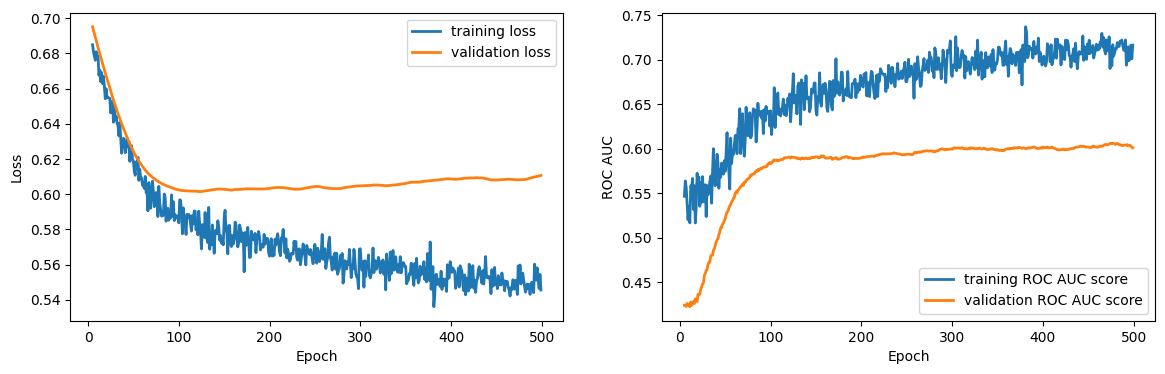

In [ ]:
import matplotlib.pyplot as plt

logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_1"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_1"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
clf=model

32/32 [==============================] - 0s 940us/step


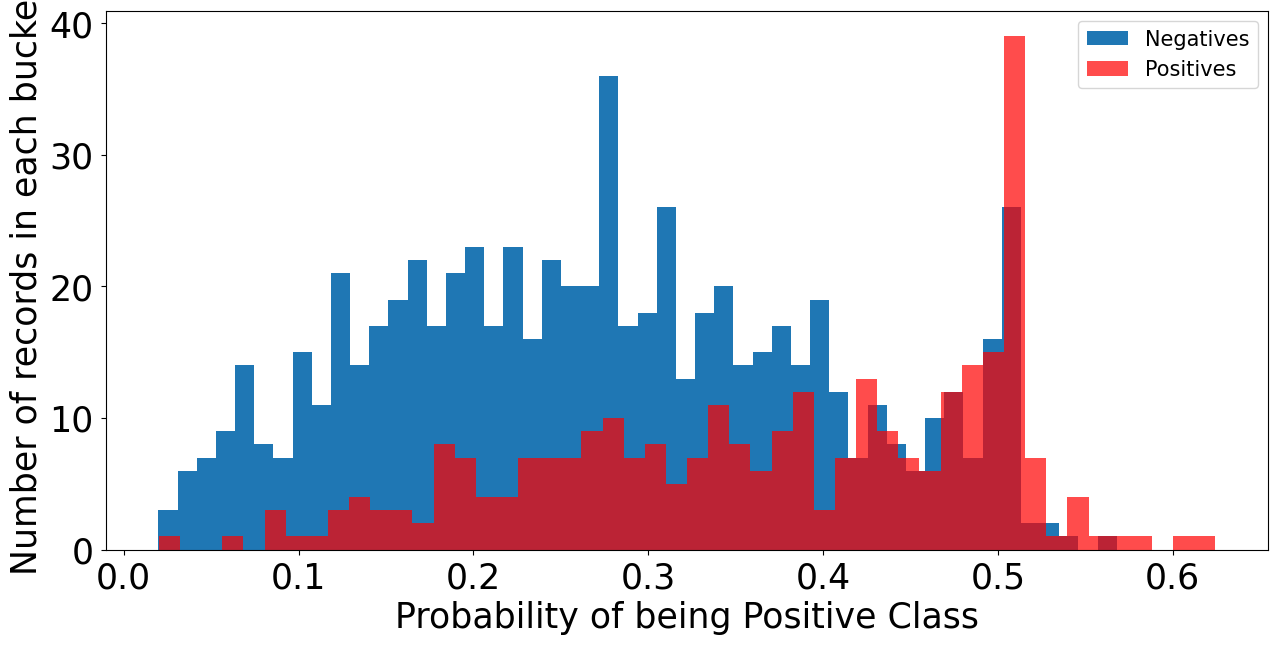

In [ ]:
import Umbrales
Umbrales.plot_prob_keras(clf, X, y)

32/32 [==============================] - 0s 1ms/step

Precisión con umbral nuevo: 0.725
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       700
           1       0.55      0.46      0.50       300

    accuracy                           0.73      1000
   macro avg       0.67      0.65      0.65      1000
weighted avg       0.71      0.72      0.72      1000



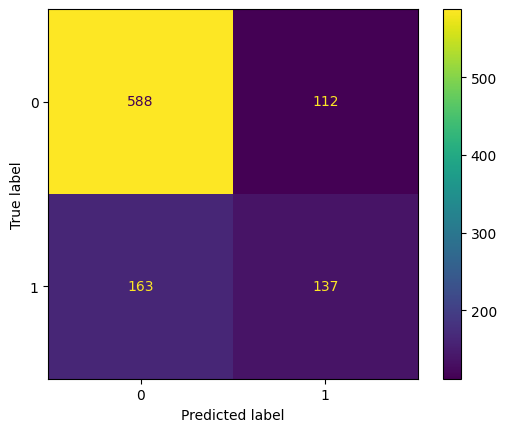

In [ ]:
Umbrales.report_umbral_keras(0.41, clf, X, y)

SIGO OBTENIENDO MALOS RESULTADOS CON KERAS, ME QUEDO FINALMENTE CON MLP.

# Prueba

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Cargar los datos
data = pd.read_csv("GermanRisk/GermanRisk/german_credit_data.csv")

# Manejar los valores faltantes
imputer = SimpleImputer(strategy="most_frequent")
data["Saving accounts"] = imputer.fit_transform(data[["Saving accounts"]])[:, 0]  # Corrección aquí
data["Checking account"] = imputer.fit_transform(data[["Checking account"]])[:, 0]  # Corrección aquí

# Codificar las variables categóricas
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["Housing"] = label_encoder.fit_transform(data["Housing"])
data["Saving accounts"] = label_encoder.fit_transform(data["Saving accounts"])
data["Checking account"] = label_encoder.fit_transform(data["Checking account"])
data["Purpose"] = label_encoder.fit_transform(data["Purpose"])
data["Risk"] = label_encoder.fit_transform(data["Risk"])

# Escalar las características numéricas
scaler = StandardScaler()
data[["Age", "Credit amount", "Duration"]] = scaler.fit_transform(data[["Age", "Credit amount", "Duration"]])


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('Risk', axis=1)  # Características
y = data['Risk']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
modelo = Sequential()
modelo.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta con 64 neuronas y función de activación ReLU
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida con 1 neurona y función de activación sigmoide

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
puntuacion = modelo.evaluate(X_test, y_test)
print("Precisión del modelo: %.2f%%" % (puntuacion[1] * 100))

nt_clf=modelo

Epoch 1/10
25/25 [==============================] - 1s 7ms/step - loss: 13.5279 - accuracy: 0.5987 - val_loss: 1.1813 - val_accuracy: 0.3100
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 2.2197 - accuracy: 0.5987 - val_loss: 2.2951 - val_accuracy: 0.7150
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 1.3368 - accuracy: 0.5813 - val_loss: 0.6501 - val_accuracy: 0.6550
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6612 - val_loss: 0.6392 - val_accuracy: 0.6600
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6825 - val_loss: 0.7092 - val_accuracy: 0.5350
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.6737 - val_loss: 0.6225 - val_accuracy: 0.6600
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.6938 - val_loss: 0.6501 - val_accuracy: 0.7100
Epoch 8/10
25/25 [=

32/32 [==============================] - 0s 904us/step


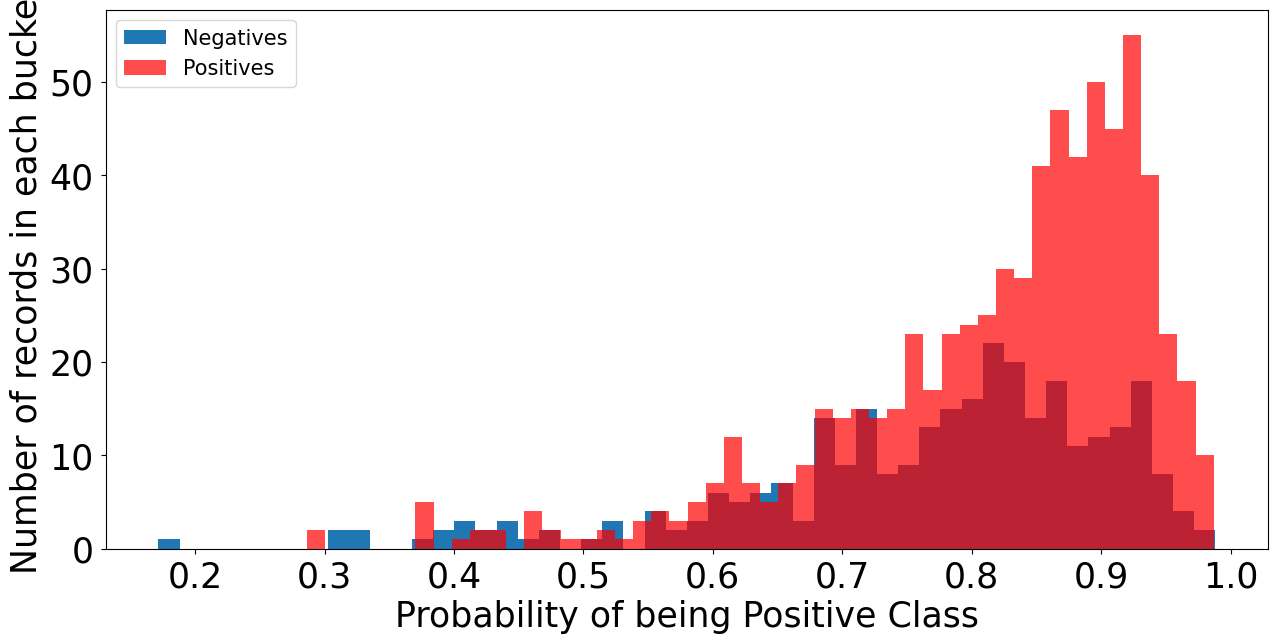

In [42]:
Umbrales.plot_prob_keras(nt_clf, X, y)

In [ ]:
Umbrales.report_umbral_keras(0.49, clf, X, y)

32/32 [==============================] - 0s 1ms/step

Precisión con umbral nuevo: 0.73
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       700
           1       0.63      0.25      0.35       300

    accuracy                           0.73      1000
   macro avg       0.69      0.59      0.59      1000
weighted avg       0.71      0.73      0.69      1000



AttributeError: 'Sequential' object has no attribute 'classes_'